In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Importing and  preprocessing 

In [3]:
btc_df=pd.read_csv("data/btc_df.csv", parse_dates=['Date'],index_col='Date')

In [4]:
gold_df=pd.read_csv('data/gold_df.csv',parse_dates=['Date'],index_col='Date')

In [5]:
currency_I_df=pd.read_csv('data/currecy_I_df.csv',parse_dates=['Date'],index_col='Date')

In [6]:
currency_II_df=pd.read_csv('data/currecy_II_df.csv',parse_dates=['Date'],index_col='Date')

In [7]:
vix_df=pd.read_csv('data/cobe_vix_df.csv',parse_dates=['Date'],index_col='Date')

In [8]:
sp500_df=pd.read_csv('data/SP500_df.csv',parse_dates=['Date'],index_col='Date')

In [9]:
 #btc_df.info()
# btc_df.head()
# btc_df.describe()
print(btc_df.isnull().sum())

BCHAIN/TOTBC      1
BCHAIN/MKTCP      6
BCHAIN/TRFEE      0
BCHAIN/TRFUS      6
BCHAIN/NETDF    710
BCHAIN/NTRAN      0
BCHAIN/NTRAT      0
BCHAIN/NTREP      0
BCHAIN/NADDU      0
BCHAIN/NTRBL      0
BCHAIN/TOUTV      0
BCHAIN/ETRAV      0
BCHAIN/ETRVU      6
BCHAIN/TRVOU      6
BCHAIN/TVTVR    710
BCHAIN/MKPRU      0
BCHAIN/CPTRV      0
BCHAIN/CPTRA      6
BCHAIN/HRATE      1
BCHAIN/MIREV      6
BCHAIN/ATRCT      0
BCHAIN/BCDDC    707
BCHAIN/BCDDE    707
BCHAIN/BCDDW    707
BCHAIN/BCDDM    707
BCHAIN/BCDDY    707
BCHAIN/BLCHS      0
BCHAIN/AVBLS      0
BCHAIN/MWTRV      0
BCHAIN/MWNUS     24
BCHAIN/MWNTD      0
BCHAIN/MIOPM    741
BCHAIN/DIFF       0
dtype: int64


In [10]:
# following the observed missing values , I will drop variables with  higher number of NAs. 
columns_drop=['BCHAIN/NETDF',"BCHAIN/TVTVR","BCHAIN/BCDDC", "BCHAIN/BCDDE","BCHAIN/BCDDW", "BCHAIN/BCDDM","BCHAIN/BCDDY","BCHAIN/MIOPM"]
#df.drop(df.columns[[1, 69]], axis=1, inplace=True)
btc_df.drop(columns_drop, axis=1, inplace=True)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-03 to 2018-06-27
Data columns (total 25 columns):
BCHAIN/TOTBC    3462 non-null float64
BCHAIN/MKTCP    3457 non-null float64
BCHAIN/TRFEE    3463 non-null float64
BCHAIN/TRFUS    3457 non-null float64
BCHAIN/NTRAN    3463 non-null float64
BCHAIN/NTRAT    3463 non-null float64
BCHAIN/NTREP    3463 non-null float64
BCHAIN/NADDU    3463 non-null float64
BCHAIN/NTRBL    3463 non-null float64
BCHAIN/TOUTV    3463 non-null float64
BCHAIN/ETRAV    3463 non-null float64
BCHAIN/ETRVU    3457 non-null float64
BCHAIN/TRVOU    3457 non-null float64
BCHAIN/MKPRU    3463 non-null float64
BCHAIN/CPTRV    3463 non-null float64
BCHAIN/CPTRA    3457 non-null float64
BCHAIN/HRATE    3462 non-null float64
BCHAIN/MIREV    3457 non-null float64
BCHAIN/ATRCT    3463 non-null float64
BCHAIN/BLCHS    3463 non-null float64
BCHAIN/AVBLS    3463 non-null float64
BCHAIN/MWTRV    3463 non-null float64
BCHAIN/MWNUS    3439 non-null float64
B

In [11]:
btc_df=btc_df.asfreq("D")
btc_df.isnull().sum()
# Our data is  has included all the calander days. 
# Now, filling the missing values is the next step. I prefere to propagate a forward fill
btc_df.fillna(method='ffill', inplace=True)

In [12]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


In [13]:
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,902.989990,934.729980,899.349976,931.799988,931.799988,4048270000
2009-01-05,929.169983,936.630005,919.530029,927.450012,927.450012,5413910000
2009-01-06,931.169983,943.849976,927.280029,934.700012,934.700012,5392620000
2009-01-07,927.450012,927.450012,902.369995,906.650024,906.650024,4704940000
2009-01-08,905.729980,910.000000,896.809998,909.729980,909.729980,4991550000


In [14]:
# I prefer to use the closing price, since i am using the ffill, it is a better approximation 
sp500_close_df=sp500_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
sp500_close_df.info()
sp500_close_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 1 columns):
Close    2387 non-null float64
dtypes: float64(1)
memory usage: 37.3 KB


Close    0
dtype: int64

In [15]:
# resampling/changing frequency and filling na
sp500_close_df=sp500_close_df.asfreq('D', method = 'ffill')
sp500_close_df.info()
# data = data.resample("D").interpolate()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-02 to 2018-06-26
Freq: D
Data columns (total 1 columns):
Close    3463 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [16]:
# Droping the first row of the SP500 to match the start date with the btc_df.
sp500_close_df.drop(sp500_close_df.index[0], inplace=True)
sp500_close_df.rename({'Close':'sp_closing_price'}, axis=1, inplace=True)
sp500_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
sp_closing_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [17]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12759 entries, 1968-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    12758 non-null float64
dtypes: float64(1)
memory usage: 199.4 KB


In [18]:
gold_price_df=gold_df['2009-01-02':]
#gold_price_df.isnull().sum()
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2009-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


In [19]:
gold_price_df=gold_price_df.asfreq("D", method='ffill')
gold_price_df.isnull().sum()
gold_price_df.drop(gold_price_df.index[0], inplace=True)
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
gold_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [20]:
gold_price_df.head()

,gold_price
Date,
2009-01-03,869.75
2009-01-04,869.75
2009-01-05,860.00
2009-01-06,844.00
2009-01-07,864.00


In [21]:
vix_df.info()
vix_close_df=vix_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
vix_close_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


Close    0
dtype: int64

In [22]:
vix_close_df.columns

Index(['Close'], dtype='object')

In [23]:
vix_close_df=vix_close_df.asfreq('D', method='ffill')
vix_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-02 to 2018-06-26
Freq: D
Data columns (total 1 columns):
Close    3463 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [24]:
vix_close_df.drop(vix_close_df.index[0], inplace= True)
vix_close_df.rename({'Close':'vix_closing_price'},axis=1, inplace=True)

In [25]:
vix_close_df.info()
vix_close_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
vix_closing_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


,vix_closing_price
Date,
2009-01-03,39.189999
2009-01-04,39.189999
2009-01-05,39.080002
2009-01-06,38.560001
2009-01-07,43.389999


In [26]:
currency_I_df.head()

,EUR/USD Close,EUR/USD High,EUR/USD Low,USD/JPY Close,USD/JPY High,USD/JPY Low
Date,,,,,,
2009-01-01,1.3954,1.3954,1.3954,90.80,90.80,90.80
2009-01-02,1.3855,1.4050,1.3840,92.21,92.40,90.72
2009-01-05,1.3600,1.3960,1.3546,93.20,93.56,91.80
2009-01-06,1.3527,1.3659,1.3313,93.96,94.65,92.85
2009-01-07,1.3628,1.3747,1.3430,92.68,94.12,92.45


In [27]:
currency_I_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12',
               '2009-01-13', '2009-01-14',
               ...
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18',
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-06-25', '2018-06-26'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)

In [28]:
currency_I_df.columns

Index(['EUR/USD Close', 'EUR/USD High', 'EUR/USD Low', 'USD/JPY Close',
       'USD/JPY High', 'USD/JPY Low'],
      dtype='object')

In [29]:
currency_I_df.drop(['EUR/USD High', 'EUR/USD Low', 
       'USD/JPY High', 'USD/JPY Low'],axis=1, inplace=True)

In [30]:
currency_I_close_df=currency_I_df.asfreq('D', method='ffill')
currency_I_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3464 entries, 2009-01-01 to 2018-06-26
Freq: D
Data columns (total 2 columns):
EUR/USD Close    3464 non-null float64
USD/JPY Close    3464 non-null float64
dtypes: float64(2)
memory usage: 81.2 KB


In [31]:
currency_I_close_df.drop(currency_I_close_df.index[0:2],inplace=True)

In [32]:
currency_I_close_df.head()

,EUR/USD Close,USD/JPY Close
Date,,
2009-01-03,1.3855,92.21
2009-01-04,1.3855,92.21
2009-01-05,1.3600,93.20
2009-01-06,1.3527,93.96
2009-01-07,1.3628,92.68


In [33]:
currency_II_df.head(5)

,Open,High,Low,Close
Date,,,,
2009-01-01,6.8280,6.8280,6.8280,6.8280
2009-01-02,6.8245,6.8245,6.8245,6.8245
2009-01-05,6.8372,6.8372,6.8372,6.8372
2009-01-06,6.8375,6.8375,6.8375,6.8375
2009-01-07,6.8364,6.8364,6.8364,6.8364


In [34]:
currency_II_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12',
               '2009-01-13', '2009-01-14',
               ...
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18',
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-06-25', '2018-06-26'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)

In [35]:
#currency_II_df.resample('D')

In [36]:
currency_II_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2009-01-01 to 2018-06-26
Data columns (total 4 columns):
 Open     2474 non-null float64
 High     2474 non-null float64
 Low      2474 non-null float64
 Close    2474 non-null float64
dtypes: float64(4)
memory usage: 96.6 KB


In [37]:
currency_II_df.isnull().sum()

 Open     0
 High     0
 Low      0
 Close    0
dtype: int64

In [38]:
currency_II_df=currency_II_df.asfreq('D', method='ffill')

In [39]:
currency_II_close_df=currency_II_df.drop([' Open', ' High', ' Low'], axis=1)

In [40]:
currency_II_close_df.drop(currency_II_close_df.index[0:2], inplace=True)

In [41]:
currency_II_close_df.rename({' Close':'USD/CNY Close'},axis=1, inplace=True)

In [42]:
currency_II_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
USD/CNY Close    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [43]:
currency_II_close_df.head()

,USD/CNY Close
Date,
2009-01-03,6.8245
2009-01-04,6.8245
2009-01-05,6.8372
2009-01-06,6.8375
2009-01-07,6.8364


In [44]:
df=[currency_II_close_df, currency_I_close_df, btc_df, gold_price_df, sp500_close_df, vix_close_df]

In [45]:
final_df = pd.concat(df, axis=1)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2009-01-03 to 2018-06-27
Freq: D
Data columns (total 31 columns):
USD/CNY Close        3462 non-null float64
EUR/USD Close        3462 non-null float64
USD/JPY Close        3462 non-null float64
BCHAIN/TOTBC         3463 non-null float64
BCHAIN/MKTCP         3463 non-null float64
BCHAIN/TRFEE         3463 non-null float64
BCHAIN/TRFUS         3463 non-null float64
BCHAIN/NTRAN         3463 non-null float64
BCHAIN/NTRAT         3463 non-null float64
BCHAIN/NTREP         3463 non-null float64
BCHAIN/NADDU         3463 non-null float64
BCHAIN/NTRBL         3463 non-null float64
BCHAIN/TOUTV         3463 non-null float64
BCHAIN/ETRAV         3463 non-null float64
BCHAIN/ETRVU         3463 non-null float64
BCHAIN/TRVOU         3463 non-null float64
BCHAIN/MKPRU         3463 non-null float64
BCHAIN/CPTRV         3463 non-null float64
BCHAIN/CPTRA         3463 non-null float64
BCHAIN/HRATE         3462 non-null float64
BCHAIN/

In [47]:
# Droping Missing Values 
final_df.dropna(inplace=True)

In [48]:
final_df.describe()

,USD/CNY Close,EUR/USD Close,USD/JPY Close,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,...,BCHAIN/ATRCT,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/DIFF,gold_price,sp_closing_price,vix_closing_price
count,3461.000000,3461.000000,3461.000000,3.461000e+03,3.461000e+03,3461.000000,3.461000e+03,3461.000000,3.461000e+03,3461.000000,...,3461.000000,3461.000000,3461.000000,3.461000e+03,3.461000e+03,3461.000000,3.461000e+03,3461.000000,3461.000000,3461.000000
mean,6.478986,1.264053,99.005089,1.045541e+07,1.726988e+10,52.658522,2.434459e+05,93787.699220,7.050811e+07,86925.164403,...,6.725301,36136.870251,0.324577,9.594308e+04,4.294568e+06,25036.730714,2.937172e+11,1309.613219,1711.789778,18.487073
std,0.264516,0.118786,14.067077,5.310150e+06,4.451576e+10,109.782651,1.267187e+06,102887.265942,9.366149e+07,102085.404283,...,5.220901,49408.406602,0.359394,2.524165e+05,6.684005e+06,29252.078997,8.141247e+11,214.191150,527.443948,7.691563
min,6.041000,1.038720,75.720000,5.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,813.000000,676.530029,9.140000
25%,6.232900,1.140090,85.760000,6.256250e+06,2.136330e+07,3.428995,9.189767e+00,4796.000000,5.266640e+05,3779.000000,...,0.000000,44.000000,0.009662,0.000000e+00,2.000000e+00,0.000000,2.441125e+05,1189.100000,1259.780029,13.280000
50%,6.429100,1.292000,100.119000,1.177365e+07,1.525042e+09,16.509725,3.781426e+03,56685.000000,2.465934e+07,36560.000000,...,7.633333,10195.000000,0.159857,3.197619e+04,4.523020e+05,9595.000000,1.488192e+08,1279.000000,1701.839966,16.200001
75%,6.773200,1.358500,110.860000,1.519852e+07,8.112594e+09,44.519552,1.814480e+04,181832.000000,1.094779e+08,176307.000000,...,9.833333,58188.000000,0.657941,1.364805e+05,6.018211e+06,47878.000000,1.441164e+11,1386.000000,2093.320068,21.309999
max,6.960700,1.513600,125.637000,1.711562e+07,3.265254e+11,1495.946477,2.272484e+07,490644.000000,3.244345e+08,470650.000000,...,47.733333,172522.335593,1.110327,8.484600e+06,2.556751e+07,122796.000000,5.077499e+12,1896.500000,2872.870117,56.650002


# Univariate analysis

In [49]:
btc_price=final_df['BCHAIN/MKPRU']

In [50]:
btc_price.describe()

count     3461.000000
mean      1056.638364
std       2638.915393
min          0.000000
25%          2.930000
50%        135.601000
75%        596.080000
max      19498.683333
Name: BCHAIN/MKPRU, dtype: float64

In [51]:
#Remove rows of zeros from a Pandas series
btc_nonzero=btc_price[btc_price!=0]

In [52]:
len(btc_price[btc_price!=0])

2871

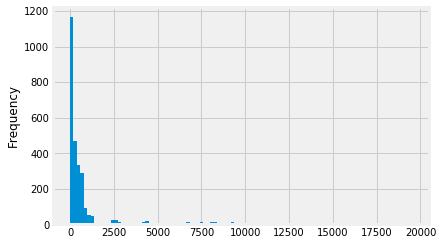

In [53]:
btc_nonzero.plot(kind='hist', bins=100)

In [54]:
btc_nonzero.describe()

count     2871.000000
mean      1273.781044
std       2849.347949
min          0.060900
25%         11.836000
50%        277.430000
75%        659.775000
max      19498.683333
Name: BCHAIN/MKPRU, dtype: float64

In [55]:
btc_nonzero.isnull().sum()

0

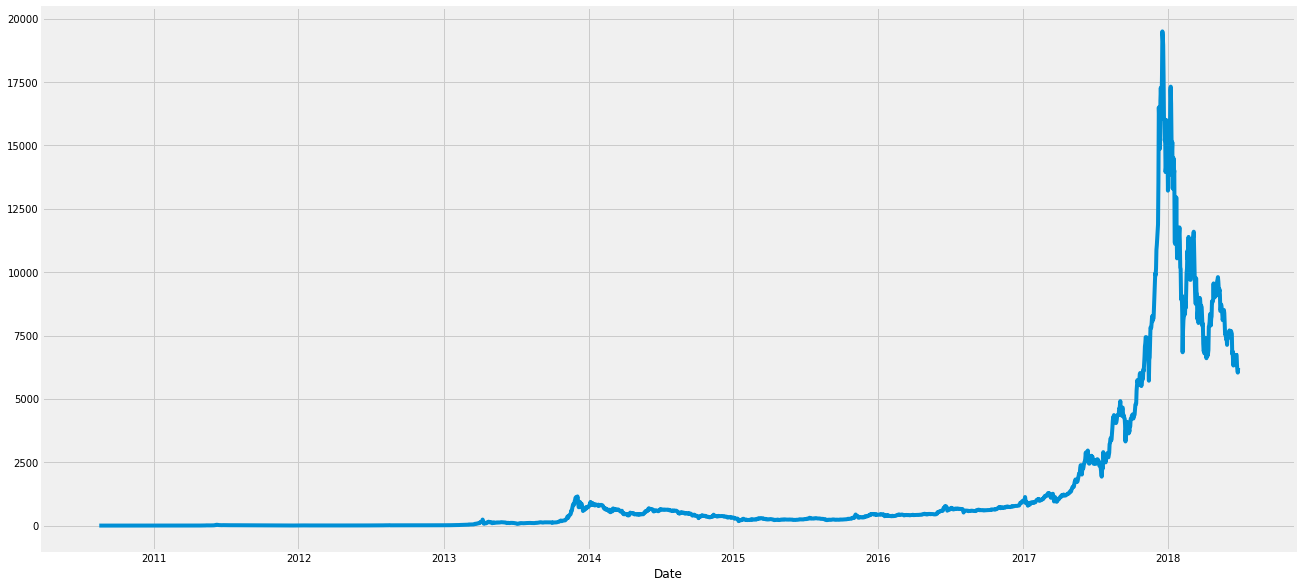

In [56]:
btc_nonzero.plot(figsize=(20,10))

# Testing for stationarity 


In [57]:
#  Def of Stationarity 
#  A time series Yt (t=1,2...) is said to be stationary (in the week sense) if its statistical properties do not vary with time (expectation, variance, autocorrelation). The white noise is an example of a stationary time series, with for example the case where Yt follows a normal distribution N(µ,s²) independent of t.

# # Identifying that a series is not stationary allows to afterwards study where the non-stationarity comes from. A non-stationary series can, for example, be stationary in difference: Yt is not stationary, but the Yt  - Yt-1  difference is stationary. It is the case of the random walk. A series can also be stationary in trend.
# Stationarity tests allow verifying whether a series is stationary or not. There are two different approaches: some tests consider as null hypothesis H0 that the series is stationary (KPSS test, Leybourne and McCabe test), and for other tests, on the opposite, the null hypothesis is on the contrary that the series is not stationary (Dickey-Fuller test, augmented Dickey-Fuller test, Phillips-Perron test, DF-GLS test).

In [58]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = timeseries.rolling(window='30D').mean()
#     rolstd = timeseries.rolling(window='30D').std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

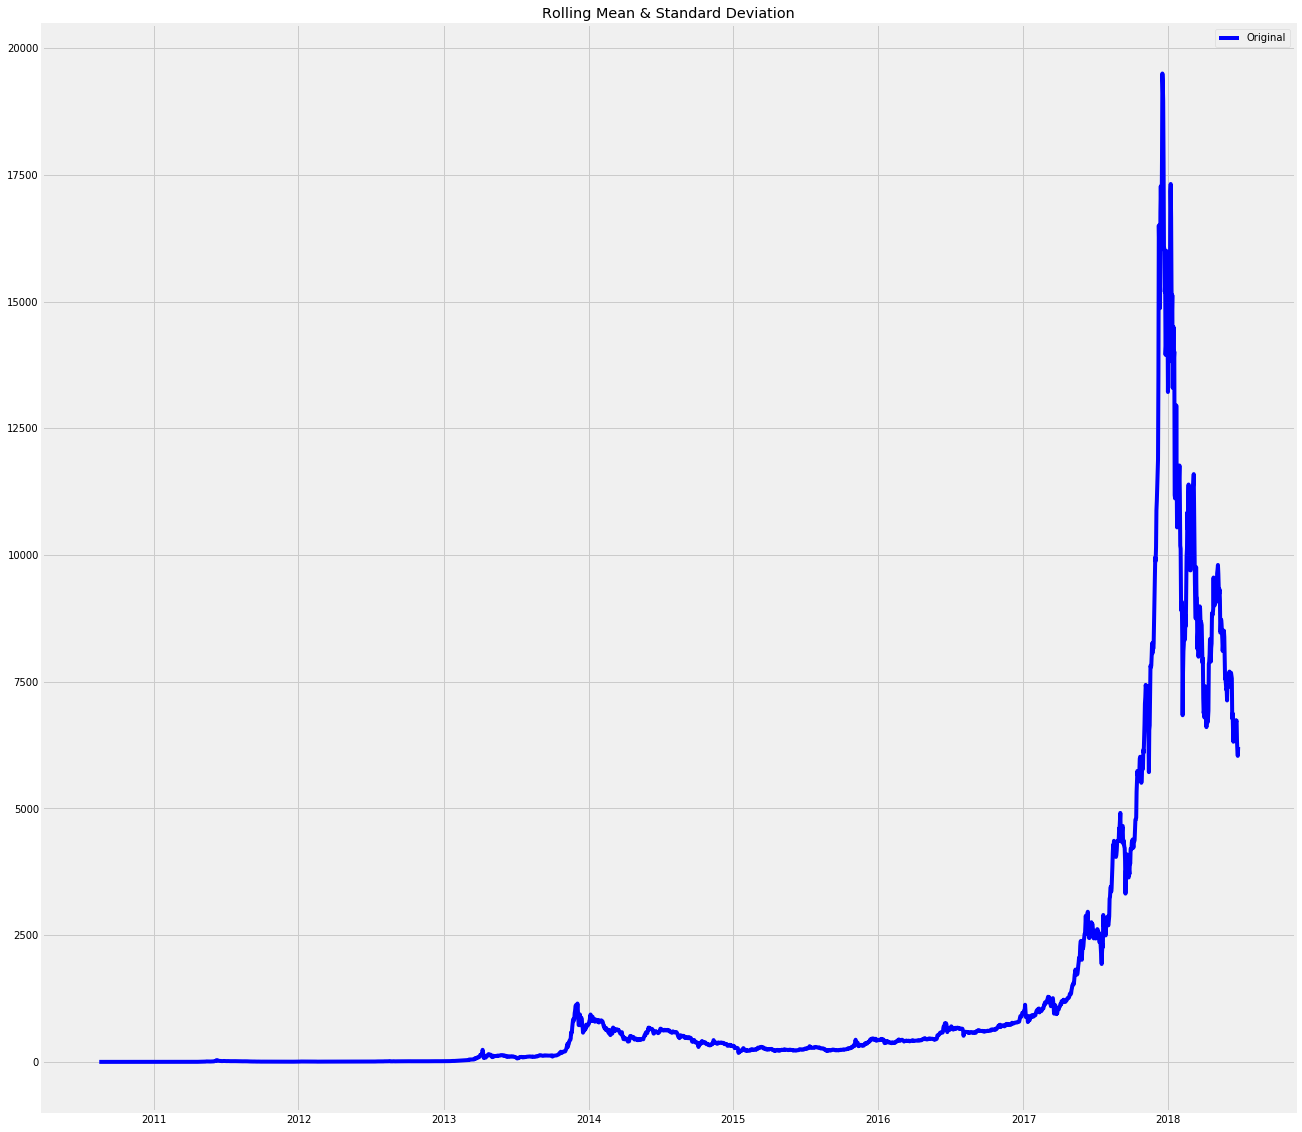

Results of Dickey-Fuller Test:
Test Statistic                   -1.863792
p-value                           0.349282
#Lags Used                       27.000000
Number of Observations Used    2843.000000
Critical Value (1%)              -3.432652
Critical Value (5%)              -2.862557
Critical Value (10%)             -2.567311
dtype: float64


In [59]:
fig, ax=plt.subplots(figsize=(20,20))

test_stationarity(btc_nonzero)


# How to make a Time Series Stationary?

In [60]:
# One of the first trick of reducing trend is transformation. Here we can have many options, among the many
# Log transformation, squreroot transformation and  first degree differencing  .

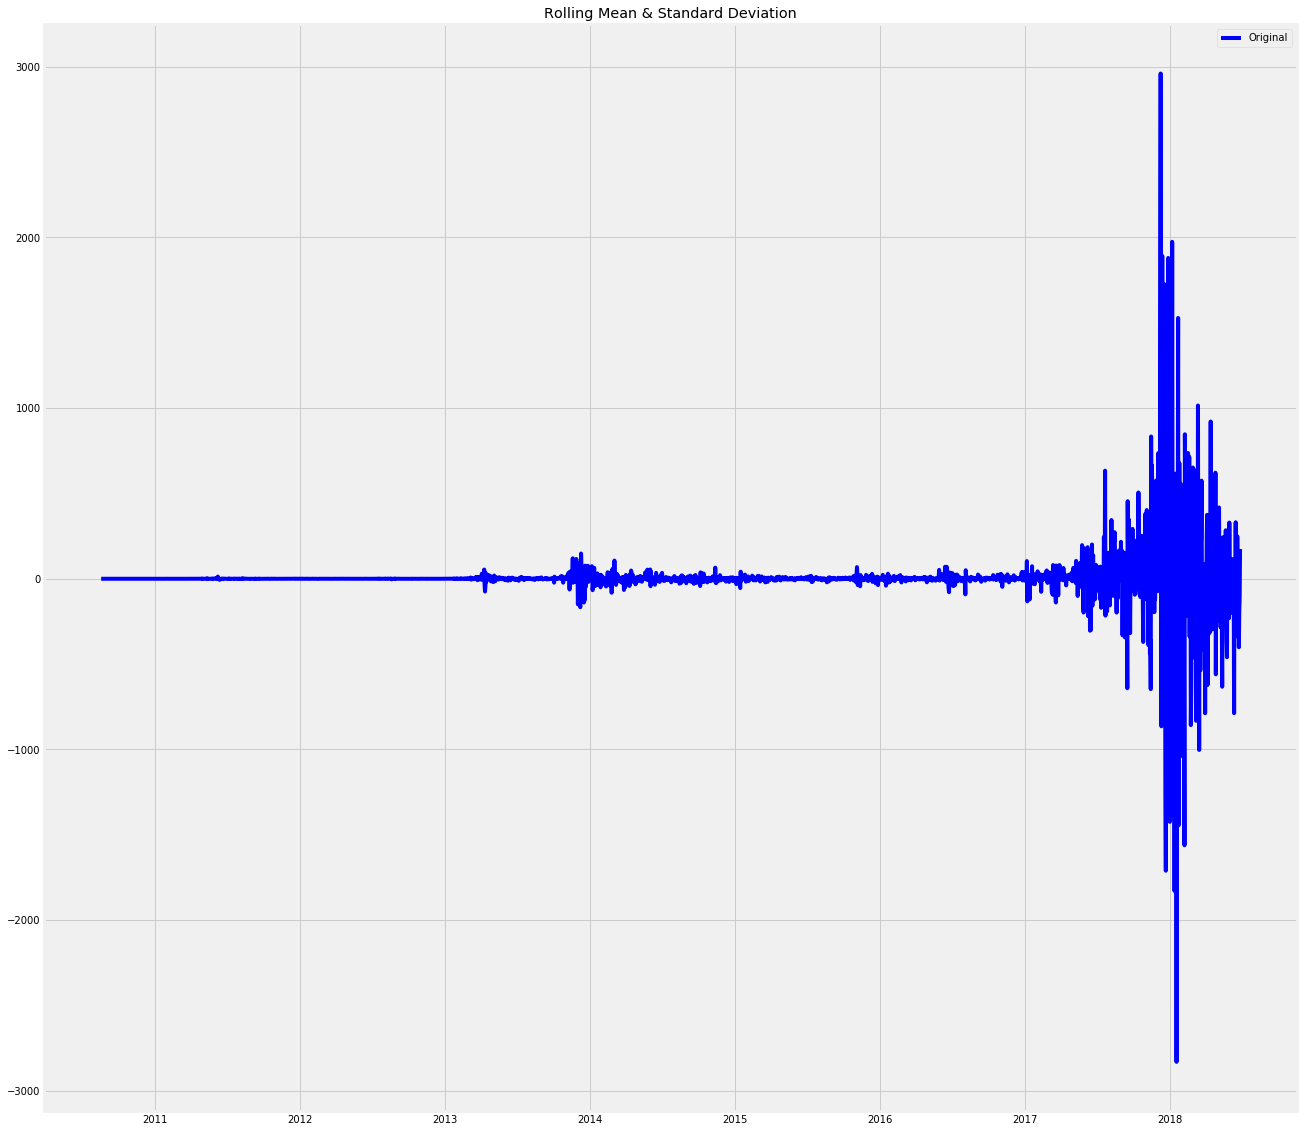

Results of Dickey-Fuller Test:
Test Statistic                -9.813783e+00
p-value                        5.566880e-17
#Lags Used                     2.800000e+01
Number of Observations Used    2.841000e+03
Critical Value (1%)           -3.432654e+00
Critical Value (5%)           -2.862558e+00
Critical Value (10%)          -2.567312e+00
dtype: float64


In [61]:
#First Degree Differencing 
fig, ax=plt.subplots(figsize=(20,20))
diff_btc_nonzero = btc_nonzero.diff().dropna()
test_stationarity(diff_btc_nonzero)

# the first difference gives us a stationary time series.

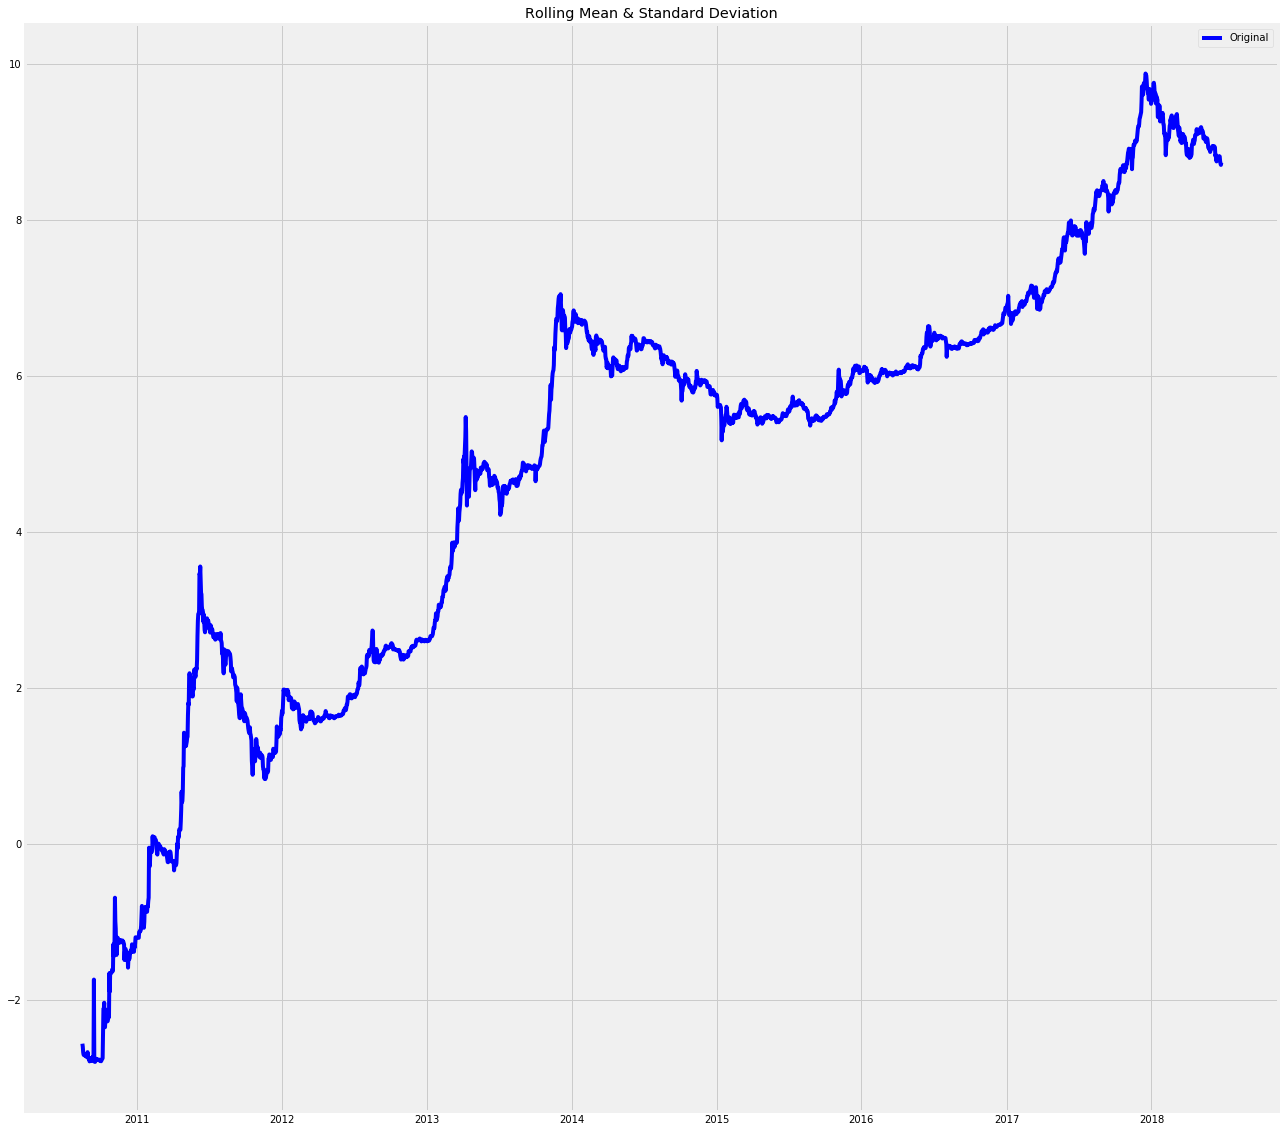

Results of Dickey-Fuller Test:
Test Statistic                   -2.570922
p-value                           0.099157
#Lags Used                       16.000000
Number of Observations Used    2854.000000
Critical Value (1%)              -3.432643
Critical Value (5%)              -2.862553
Critical Value (10%)             -2.567309
dtype: float64


In [62]:
# Log Transformation 
fig, ax=plt.subplots(figsize=(20,20))
ln_btc_nonzero=np.log(btc_nonzero).dropna()
# ln_btc_nonzero.plot()
test_stationarity(ln_btc_nonzero)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


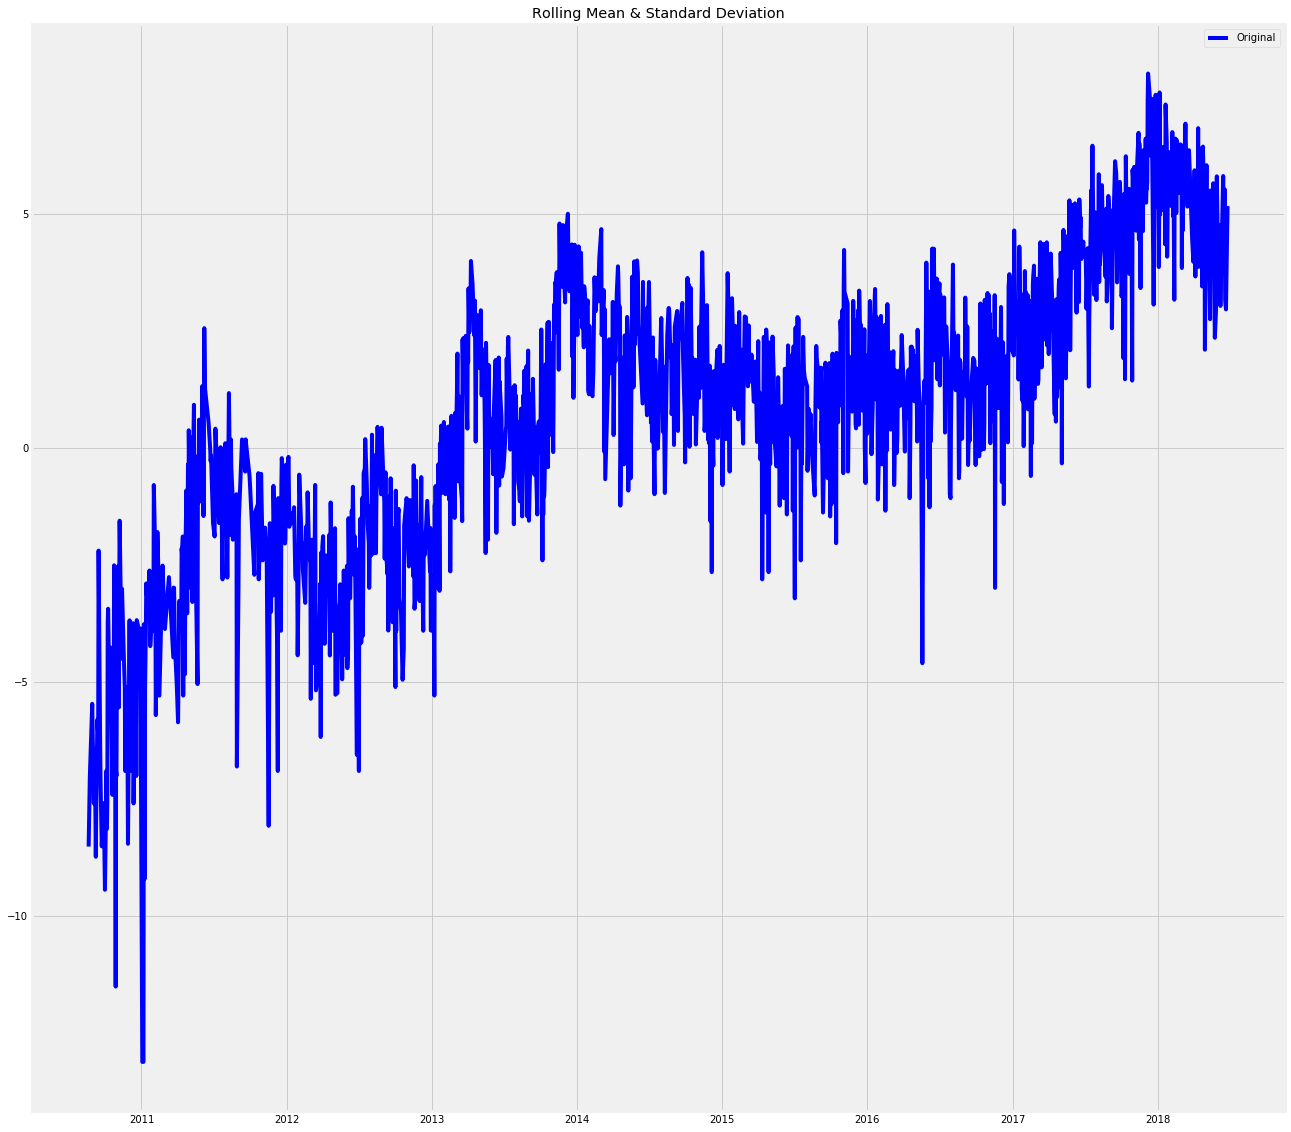

Results of Dickey-Fuller Test:
Test Statistic                   -2.757027
p-value                           0.064679
#Lags Used                       17.000000
Number of Observations Used    1463.000000
Critical Value (1%)              -3.434828
Critical Value (5%)              -2.863518
Critical Value (10%)             -2.567823
dtype: float64


In [63]:
#  Log on the first difference 
fig, ax=plt.subplots(figsize=(20,20))

log_diff=np.log(diff_btc_nonzero)
log_diff=log_diff.replace([np.inf, -np.inf], np.nan)
log_diff.dropna(inplace=True)
# for c in df.columns:
#    client.write_points(df[[c]].dropna(), 'measurement')
test_stationarity(log_diff)

In [64]:
#log_diff

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


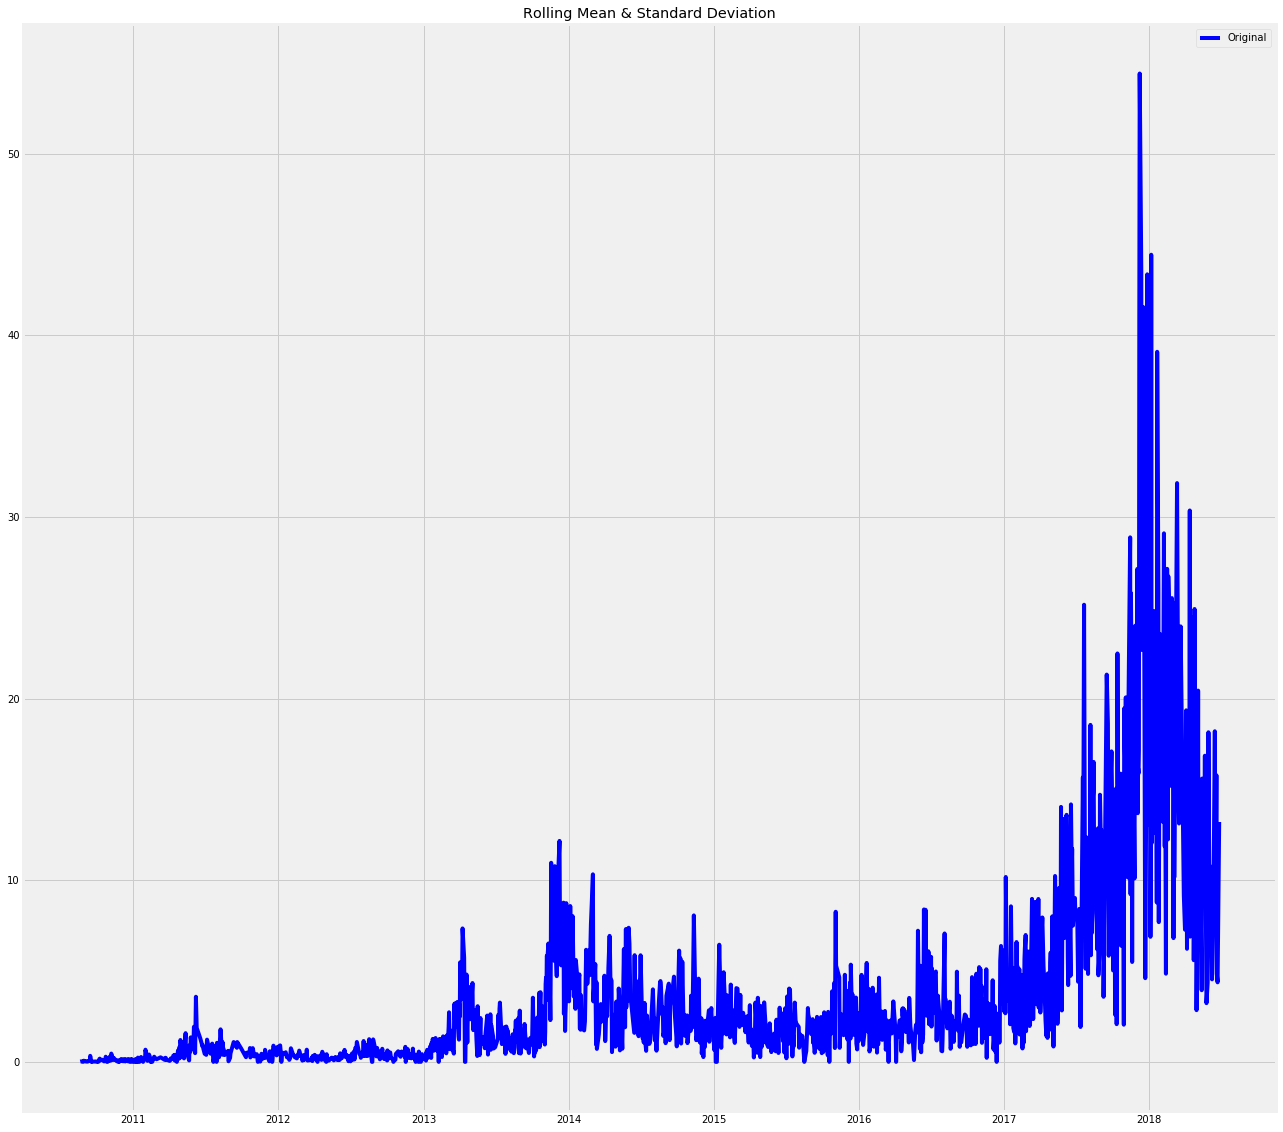

Results of Dickey-Fuller Test:
Test Statistic                   -1.511804
p-value                           0.527664
#Lags Used                       23.000000
Number of Observations Used    1500.000000
Critical Value (1%)              -3.434717
Critical Value (5%)              -2.863469
Critical Value (10%)             -2.567797
dtype: float64


In [65]:
fig, ax=plt.subplots(figsize=(20,20))

sqrt_diff=np.sqrt(diff_btc_nonzero)
sqrt_diff=sqrt_diff.replace([np.inf, -np.inf], np.nan)
sqrt_diff.dropna(inplace=True)
test_stationarity(sqrt_diff)

# Differencing

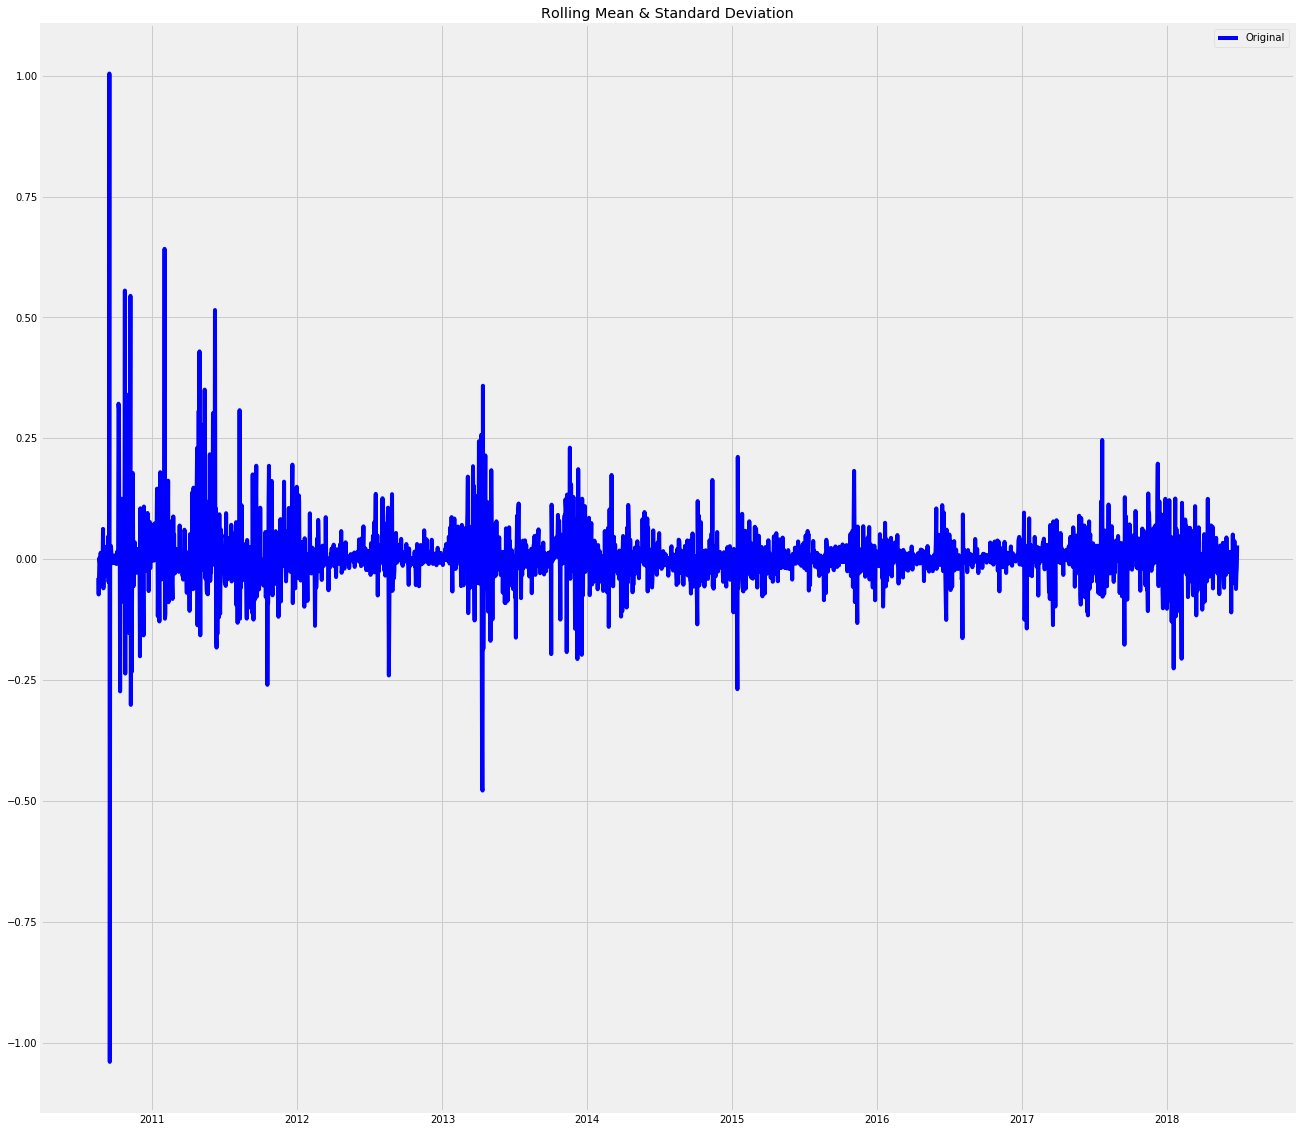

Results of Dickey-Fuller Test:
Test Statistic                -1.087471e+01
p-value                        1.340772e-19
#Lags Used                     1.500000e+01
Number of Observations Used    2.854000e+03
Critical Value (1%)           -3.432643e+00
Critical Value (5%)           -2.862553e+00
Critical Value (10%)          -2.567309e+00
dtype: float64


In [66]:
# First order difference on  log transformed data 
btc_log_diff1 = ln_btc_nonzero - ln_btc_nonzero.shift(periods=1)
btc_log_diff1.dropna(inplace=True)
fig, ax=plt.subplots(figsize=(20,20))
test_stationarity(btc_log_diff1)

# The ADF test  tells us we fail to accept the null hypothesis. This implies the series is stationary at the first order difference.

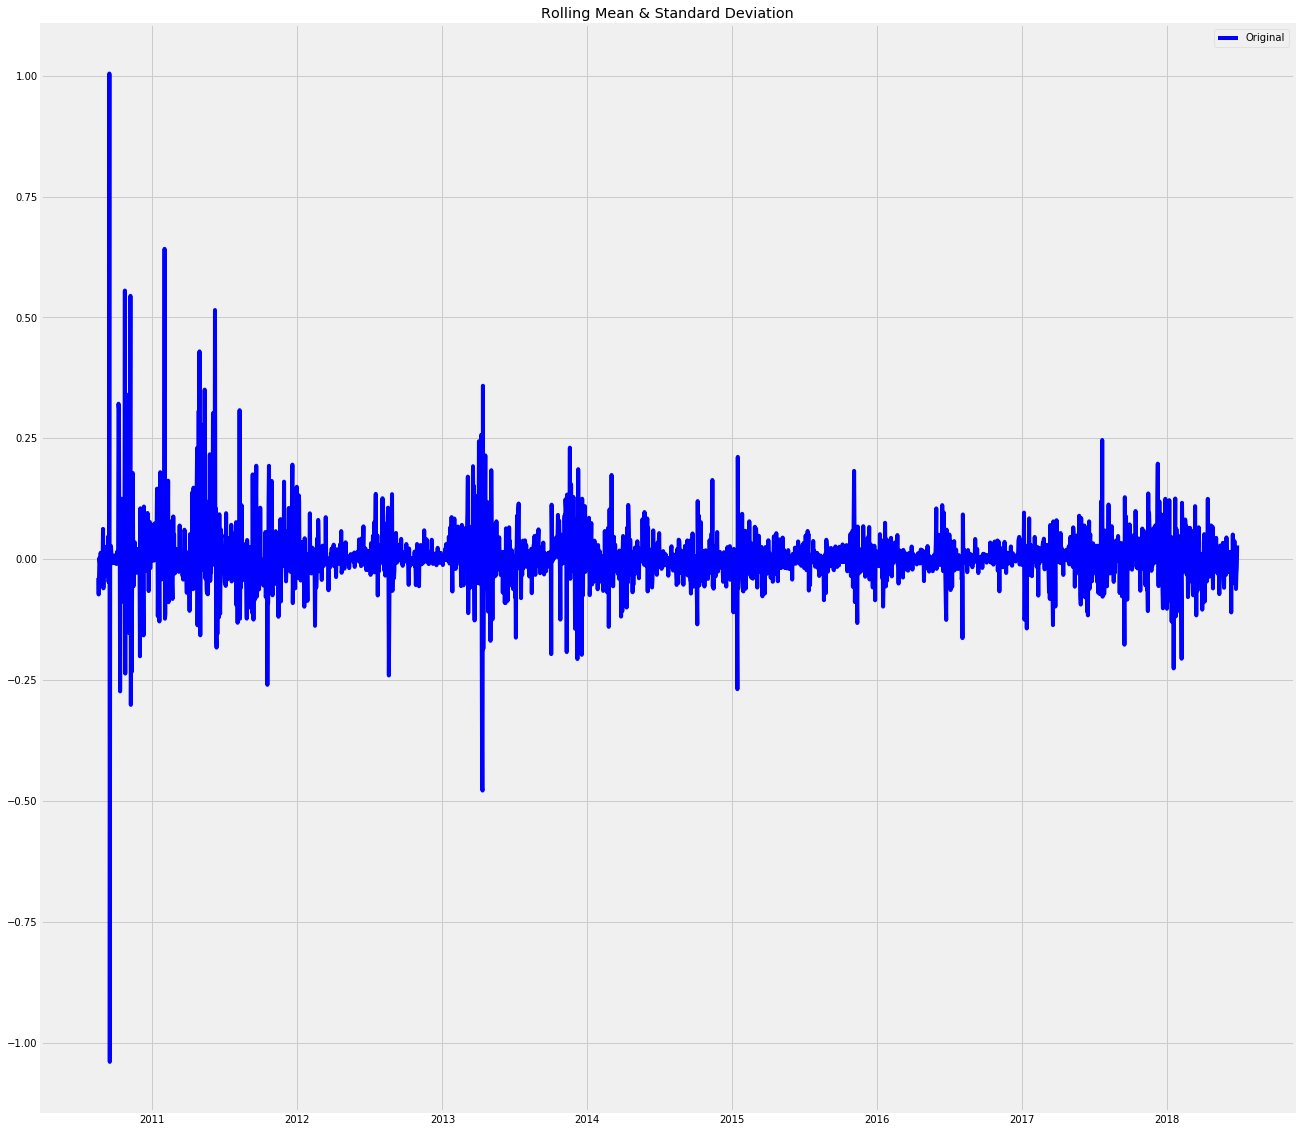

Results of Dickey-Fuller Test:
Test Statistic                -1.087471e+01
p-value                        1.340772e-19
#Lags Used                     1.500000e+01
Number of Observations Used    2.854000e+03
Critical Value (1%)           -3.432643e+00
Critical Value (5%)           -2.862553e+00
Critical Value (10%)          -2.567309e+00
dtype: float64


In [67]:
log_diff_v2=ln_btc_nonzero.diff()
log_diff_v2.dropna(inplace=True)
fig, ax= plt.subplots(figsize=(20,20))
test_stationarity(log_diff_v2)

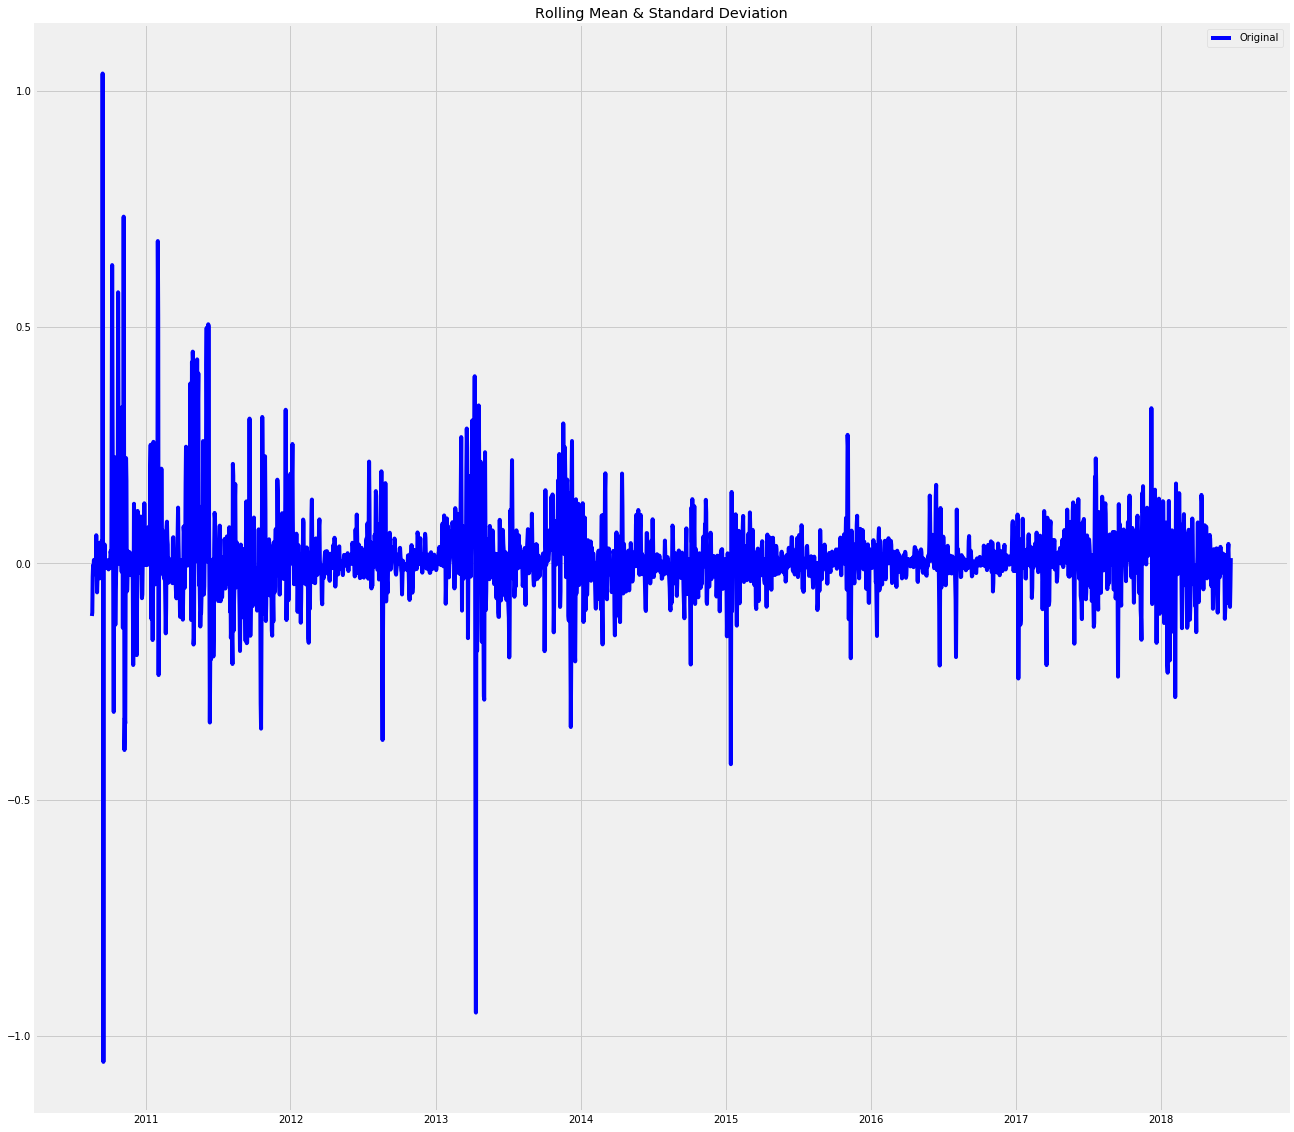

Results of Dickey-Fuller Test:
Test Statistic                -7.334170e+00
p-value                        1.107697e-10
#Lags Used                     2.800000e+01
Number of Observations Used    2.840000e+03
Critical Value (1%)           -3.432655e+00
Critical Value (5%)           -2.862558e+00
Critical Value (10%)          -2.567312e+00
dtype: float64


In [68]:
# Second order difference on  log transformed data 
fig, ax=plt.subplots(figsize=(20,20))
btc_log_diff2 = ln_btc_nonzero - ln_btc_nonzero.shift(periods=2)
btc_log_diff2.dropna(inplace=True)
test_stationarity(btc_log_diff2)

# decomposing

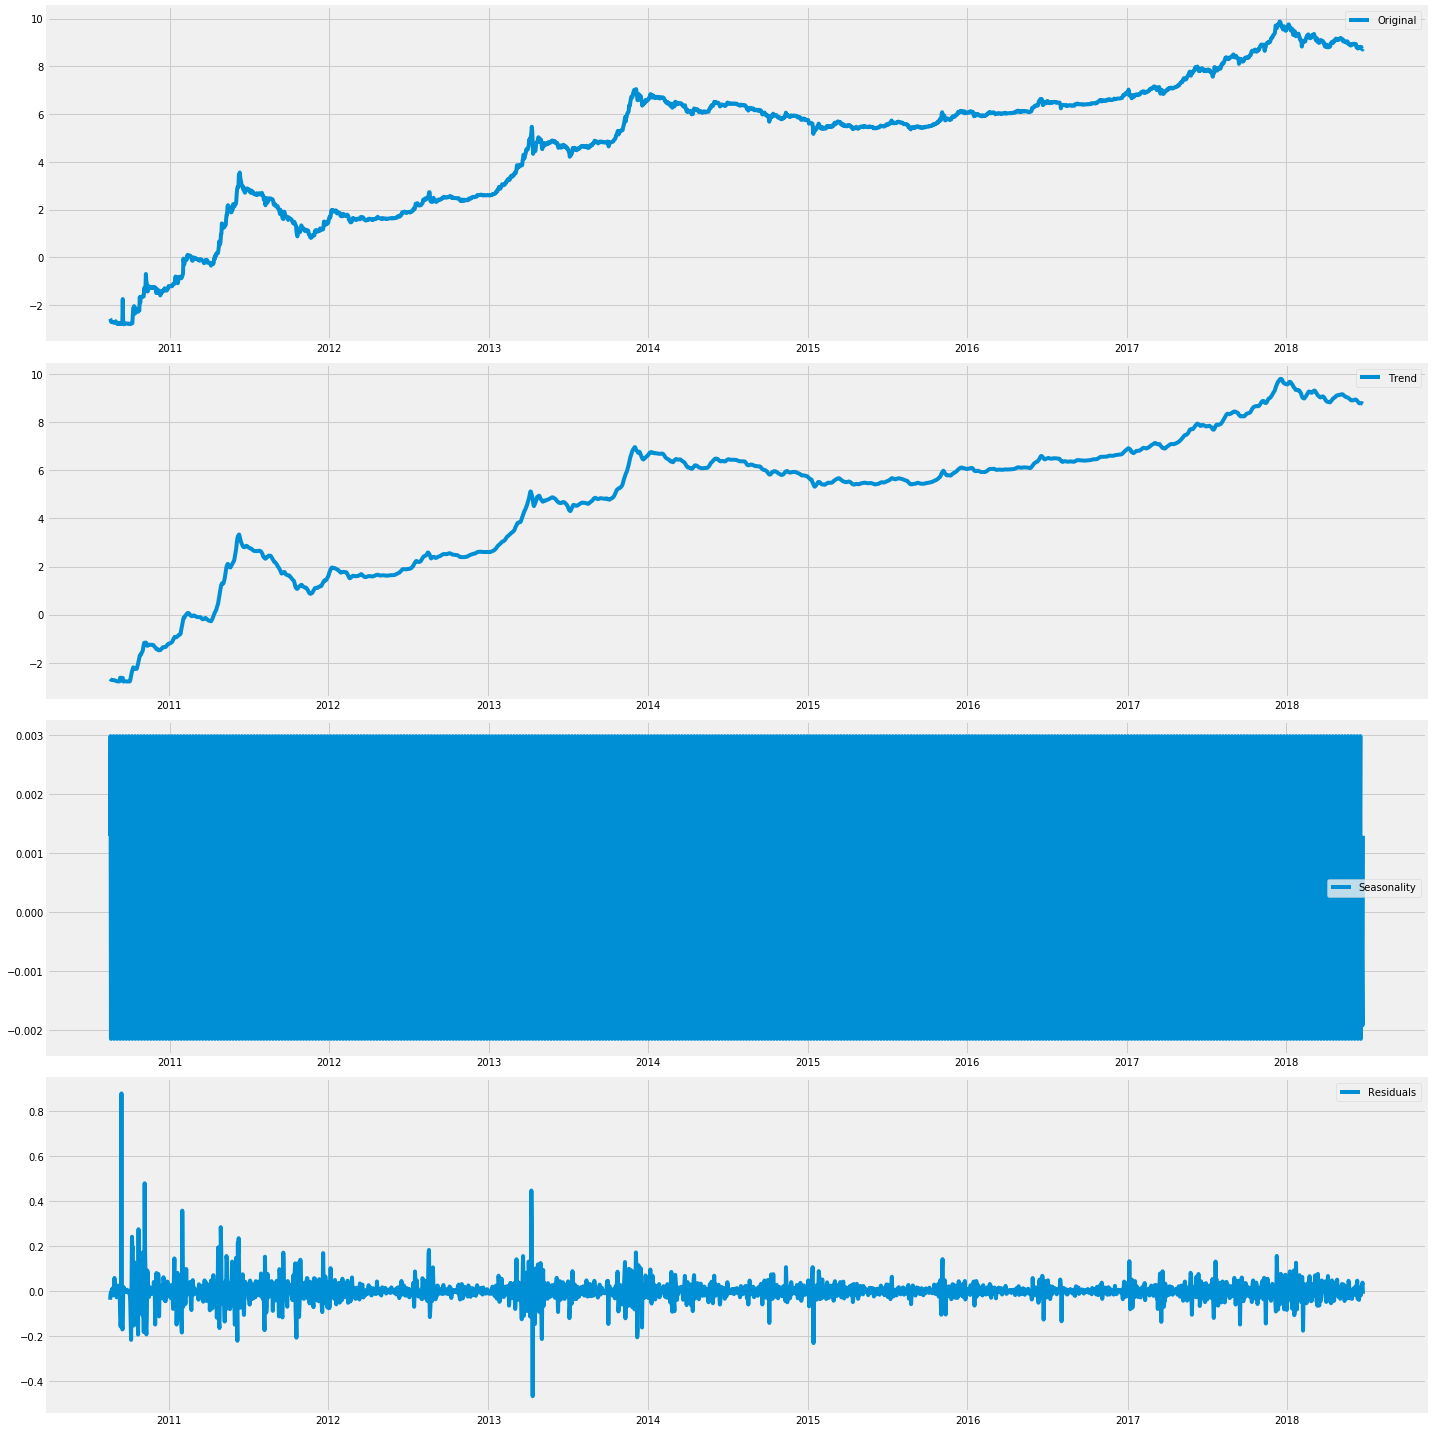

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ln_btc_nonzero)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax=plt.subplots(figsize=(20,20))
plt.subplot(411)
plt.plot(ln_btc_nonzero, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


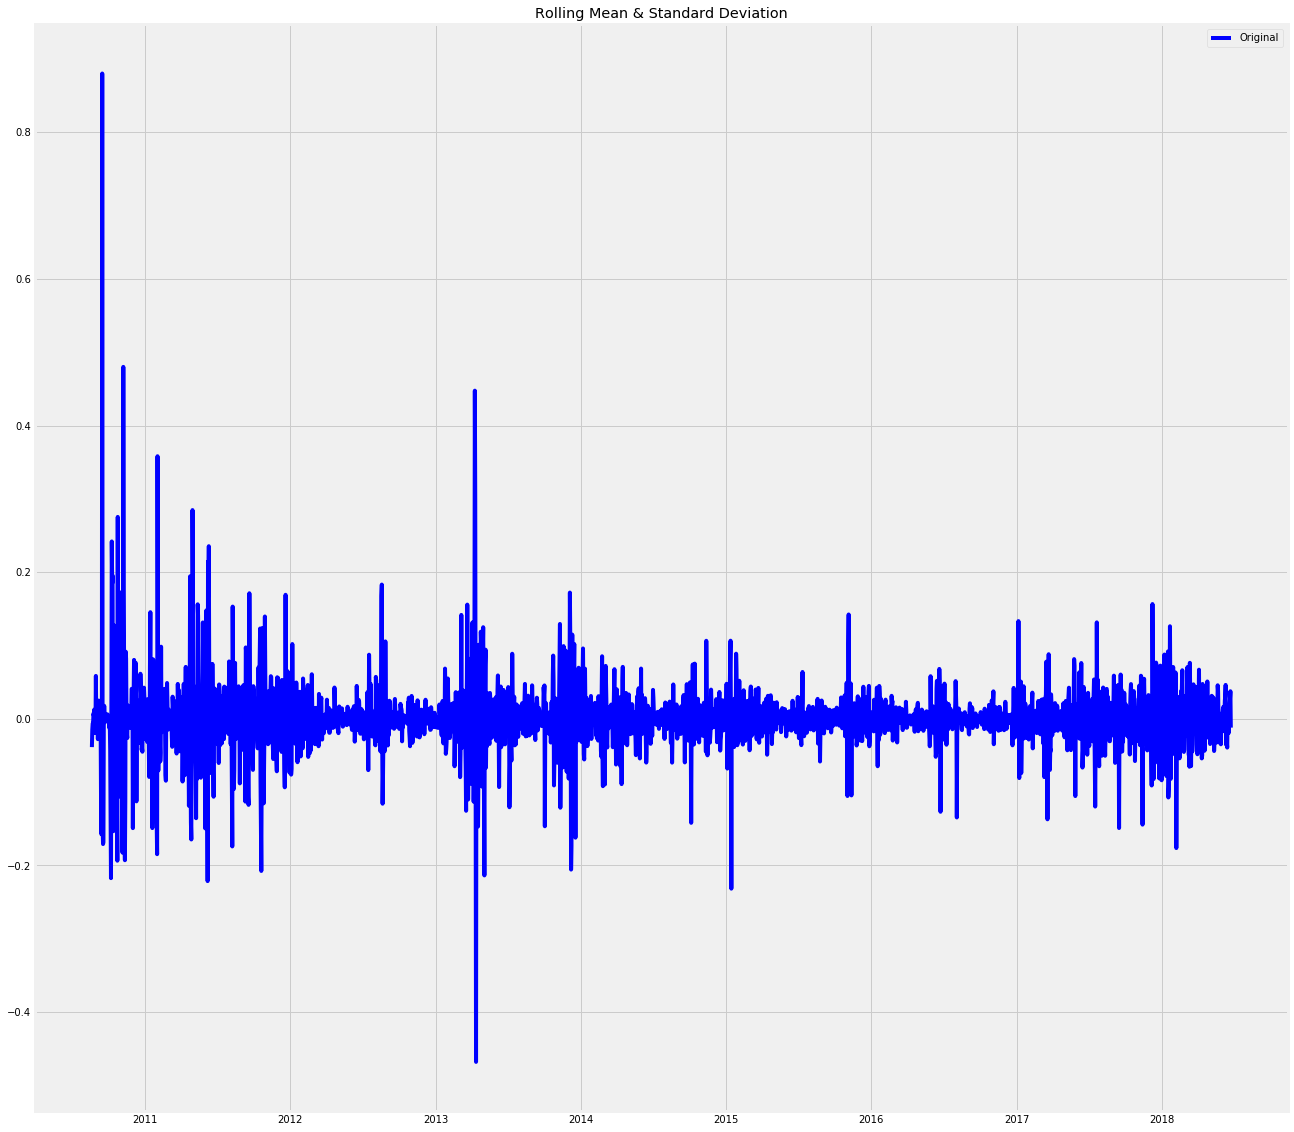

Results of Dickey-Fuller Test:
Test Statistic                -1.706072e+01
p-value                        7.950041e-30
#Lags Used                     2.600000e+01
Number of Observations Used    2.838000e+03
Critical Value (1%)           -3.432656e+00
Critical Value (5%)           -2.862559e+00
Critical Value (10%)          -2.567312e+00
dtype: float64


In [70]:
#Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:
btc_log_decompose = residual
btc_log_decompose.dropna(inplace=True)
fig, ax=plt.subplots(figsize=(20,20))
test_stationarity(btc_log_decompose)

# Forecasting a Time Series

In [71]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [72]:
btc_acf=acf(btc_log_diff1, nlags=20)
btc_pacf=pacf(btc_log_diff1, nlags=20, method='ols')

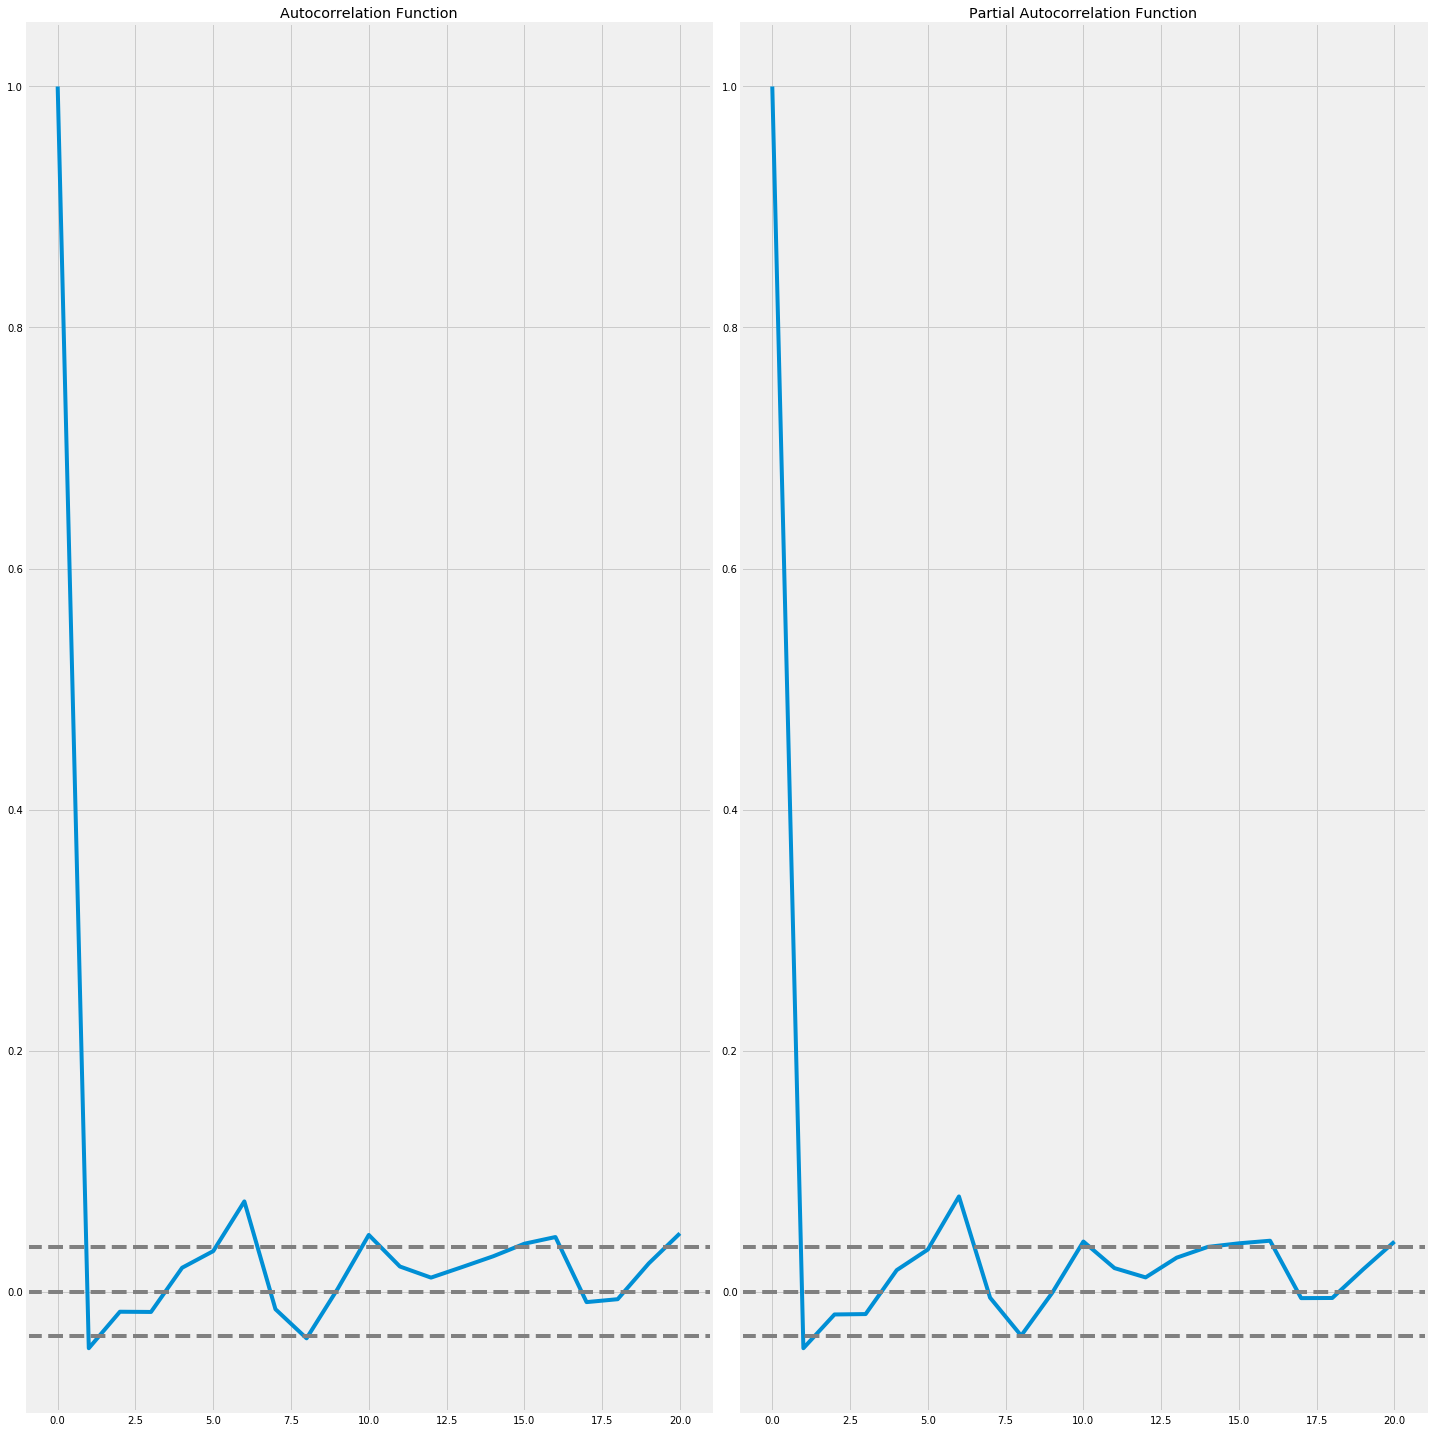

In [73]:
#Plot ACF: 
fig, ax=plt.subplots(figsize=(20,20))
plt.subplot(121) 
plt.plot(btc_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btc_log_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(btc_log_diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(btc_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btc_log_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(btc_log_diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [74]:
# p – The lag value where the PACF chart crosses the upper confidence interval for the first time.  in this case p=1.
#q – The lag value where the ACF chart crosses the upper confidence interval for the first time.  in this case q=1.

# ARIMA MODEL

In [75]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 11.6242')

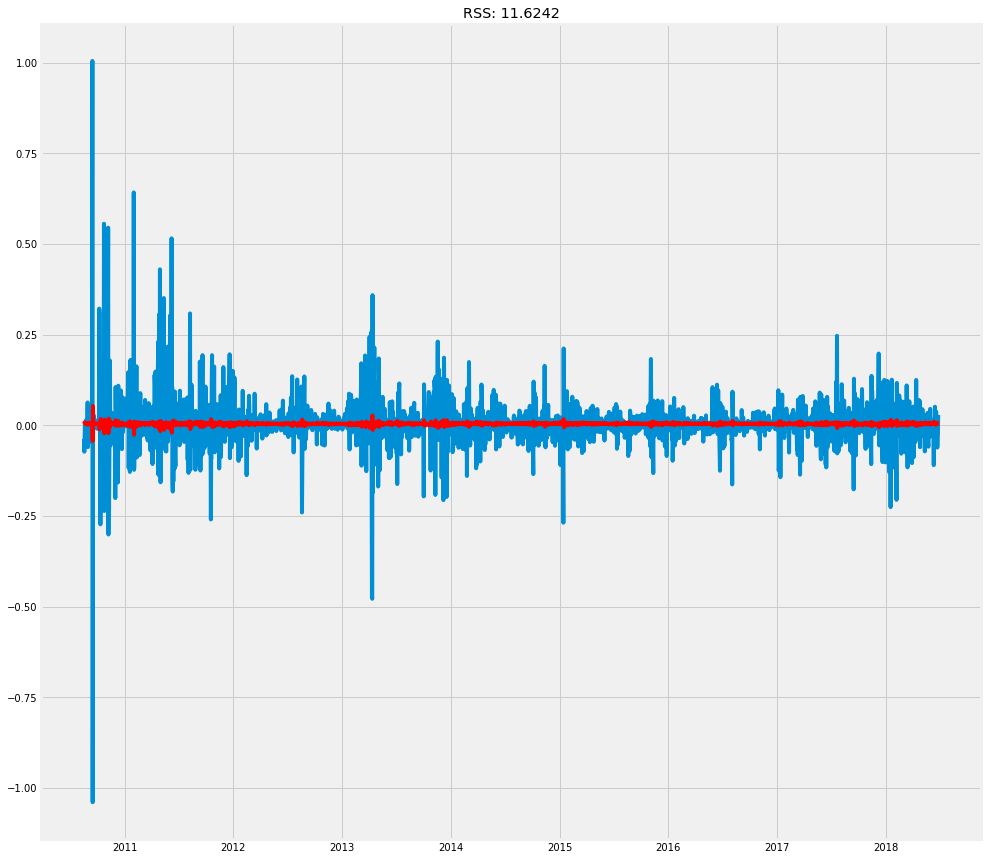

In [76]:
# AR Model 
fig, ax=plt.subplots(figsize=(15,15))

model = ARIMA(ln_btc_nonzero, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(btc_log_diff1)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-btc_log_diff1)**2))

Text(0.5,1,'RSS: 11.6232')

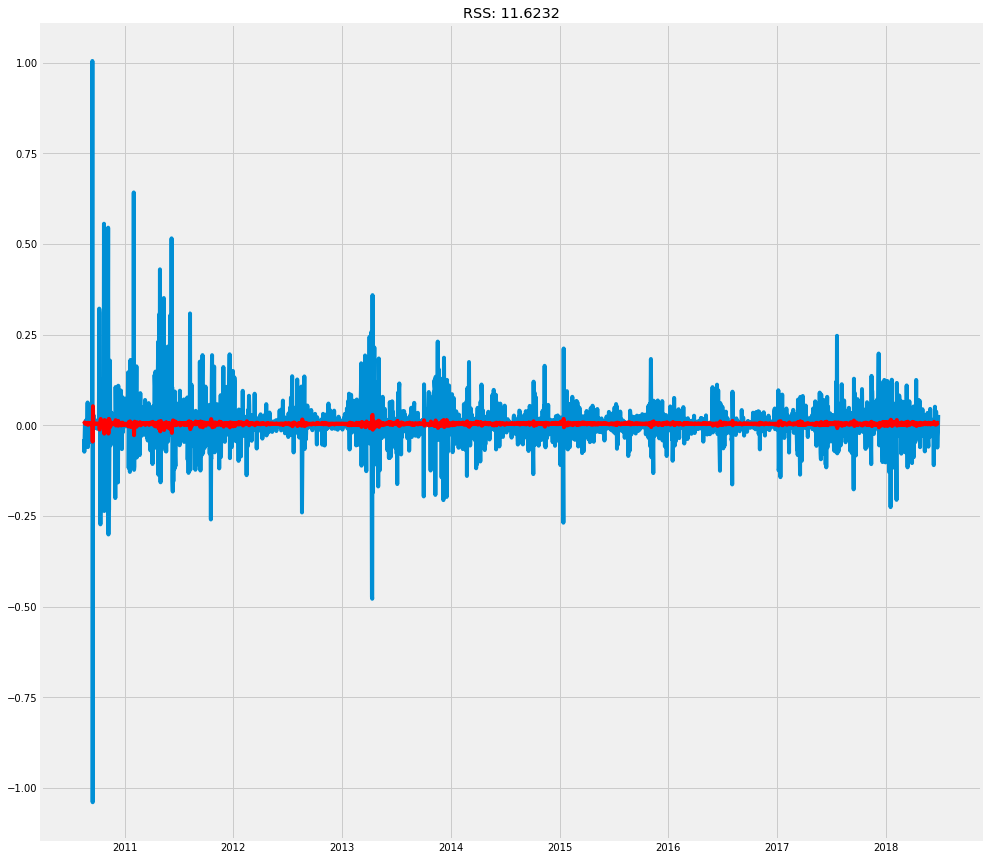

In [77]:
# MA model
fig, ax=plt.subplots(figsize=(15,15))
model=ARIMA(ln_btc_nonzero, order=(0,1,1))
results_MA= model.fit(disp=-1)
plt.plot(btc_log_diff1)
plt.plot(results_MA.fittedvalues, color='red')
plt.title(('RSS: %.4f'% sum((results_MA.fittedvalues-btc_log_diff1)**2)))


Text(0.5,1,'RSS: 11.6197')

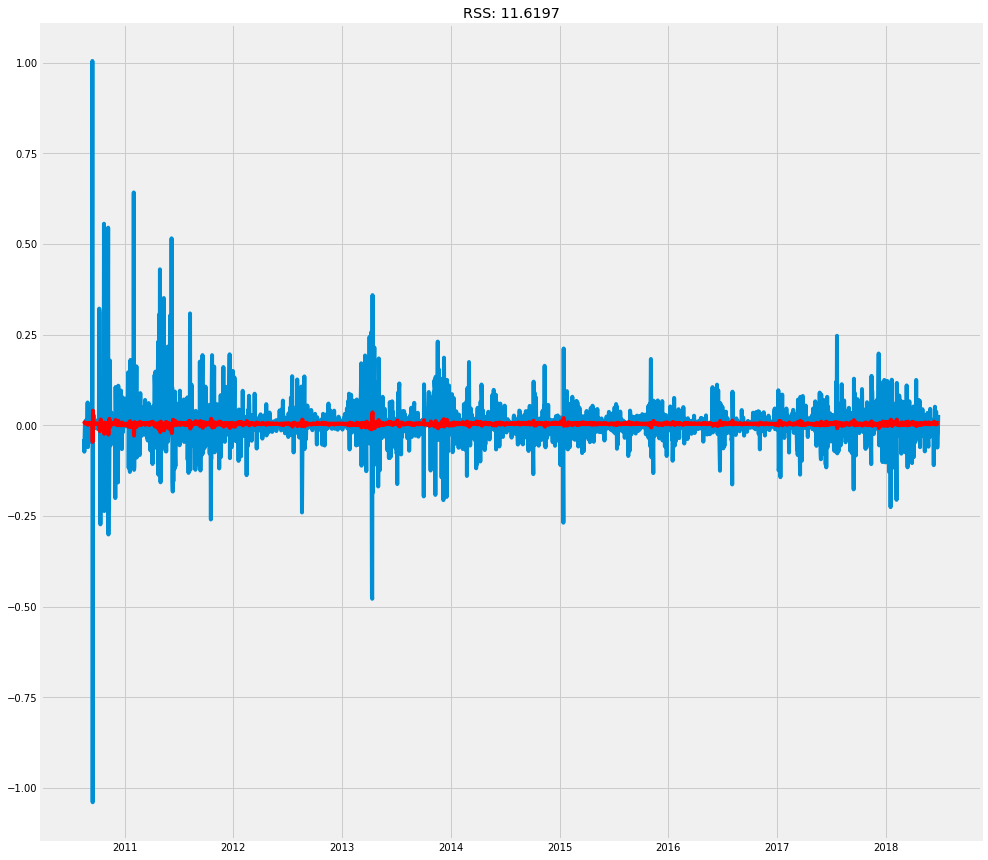

In [78]:
# Combined Model 
fig, ax=plt.subplots(figsize=(15,15))
model=ARIMA(ln_btc_nonzero, order=(1,1,1))
results_ARIMA= model.fit(disp=-1)
plt.plot(btc_log_diff1)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title(('RSS: %.4f'% sum((results_ARIMA.fittedvalues-btc_log_diff1)**2)))


In [79]:
# results_ARIMA.plot_diagnostics(figsize=(15, 12))
# plt.show()

In [80]:
# Taking it back to original scale
# Taking it back to original scale
# Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print (predictions_ARIMA_diff.head())

Date
2010-08-18    0.003938
2010-08-19    0.005996
2010-08-20    0.008356
2010-08-21    0.007021
2010-08-22    0.004934
Freq: D, dtype: float64


In [81]:
predictions_ARIMA_diff.sort_index(axis=0,ascending=True, inplace=True)

In [82]:
# his is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. 
# The cumulative sum can be found as:


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2010-08-18    0.003938
2010-08-19    0.009935
2010-08-20    0.018291
2010-08-21    0.025312
2010-08-22    0.030246
Freq: D, dtype: float64


In [83]:
#  Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. 
#     This can be done as:


predictions_ARIMA_log = pd.Series(ln_btc_nonzero.ix[0], index=ln_btc_nonzero.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Date
2010-08-17   -2.565249
2010-08-18   -2.561311
2010-08-19   -2.555315
2010-08-20   -2.546959
2010-08-21   -2.539937
Freq: D, dtype: float64

Text(0.5,1,'RMSE: 2113.1549')

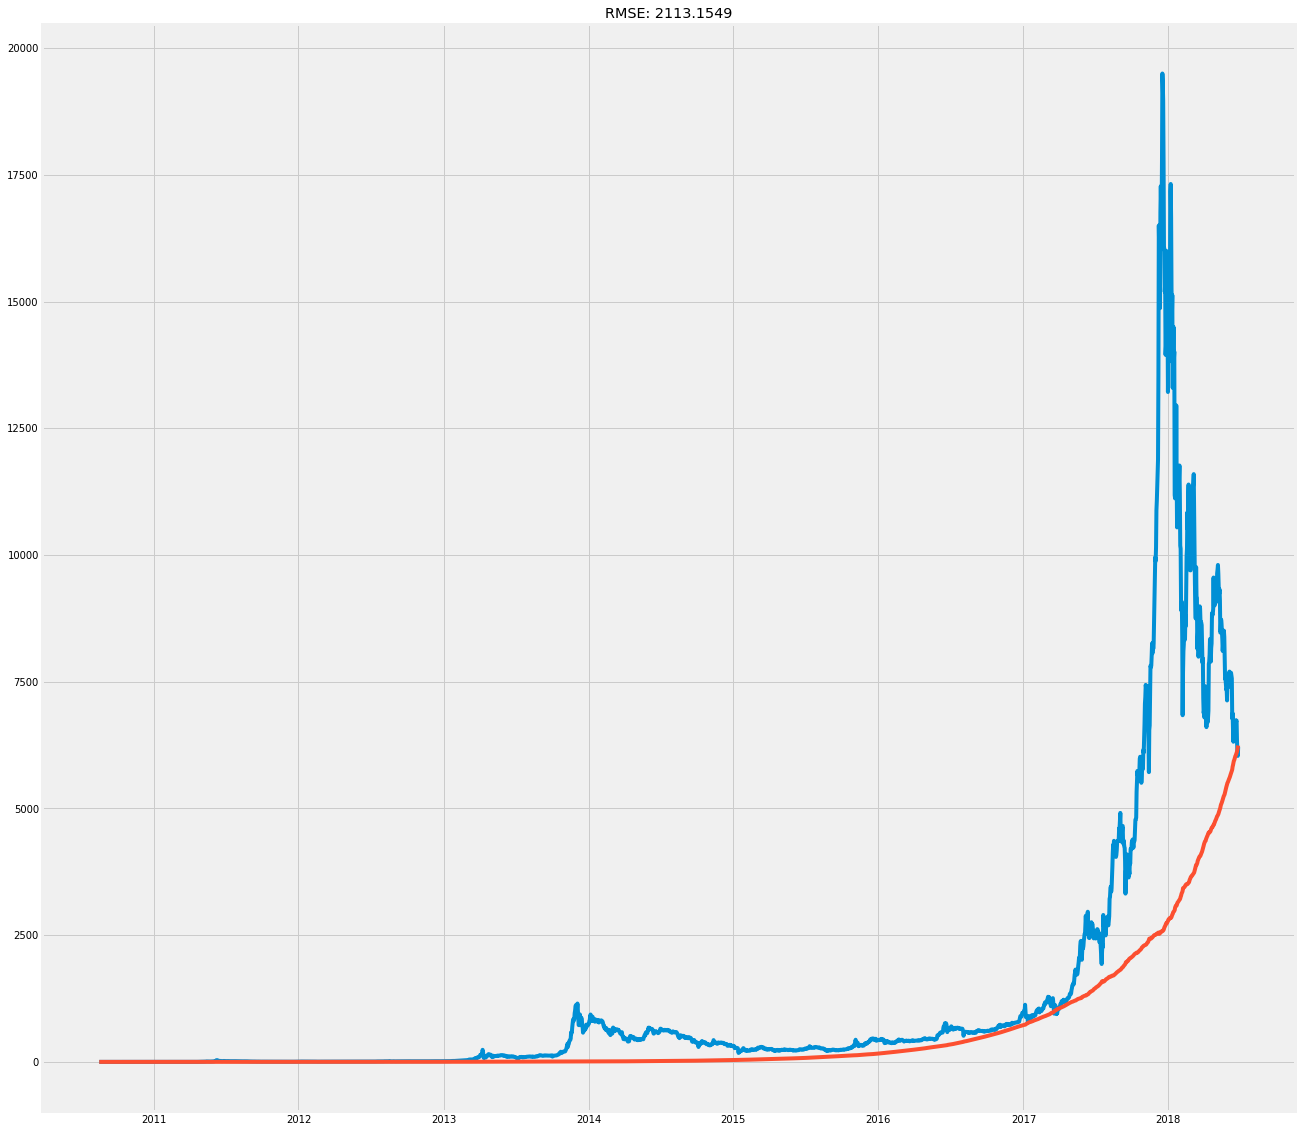

In [84]:
 #Last step is to take the exponent and compare with the original series.

fig, ax=plt.subplots(figsize=(20,20))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(btc_nonzero)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-btc_nonzero)**2)/len(btc_nonzero)))

# Univariate Series II

In [85]:
btc_nonzero.head()

Date
2010-08-17    0.076900
2010-08-18    0.074000
2010-08-19    0.068800
2010-08-20    0.066700
2010-08-21    0.066899
Freq: D, Name: BCHAIN/MKPRU, dtype: float64

In [86]:
btc_nonzero.head()

Date
2010-08-17    0.076900
2010-08-18    0.074000
2010-08-19    0.068800
2010-08-20    0.066700
2010-08-21    0.066899
Freq: D, Name: BCHAIN/MKPRU, dtype: float64

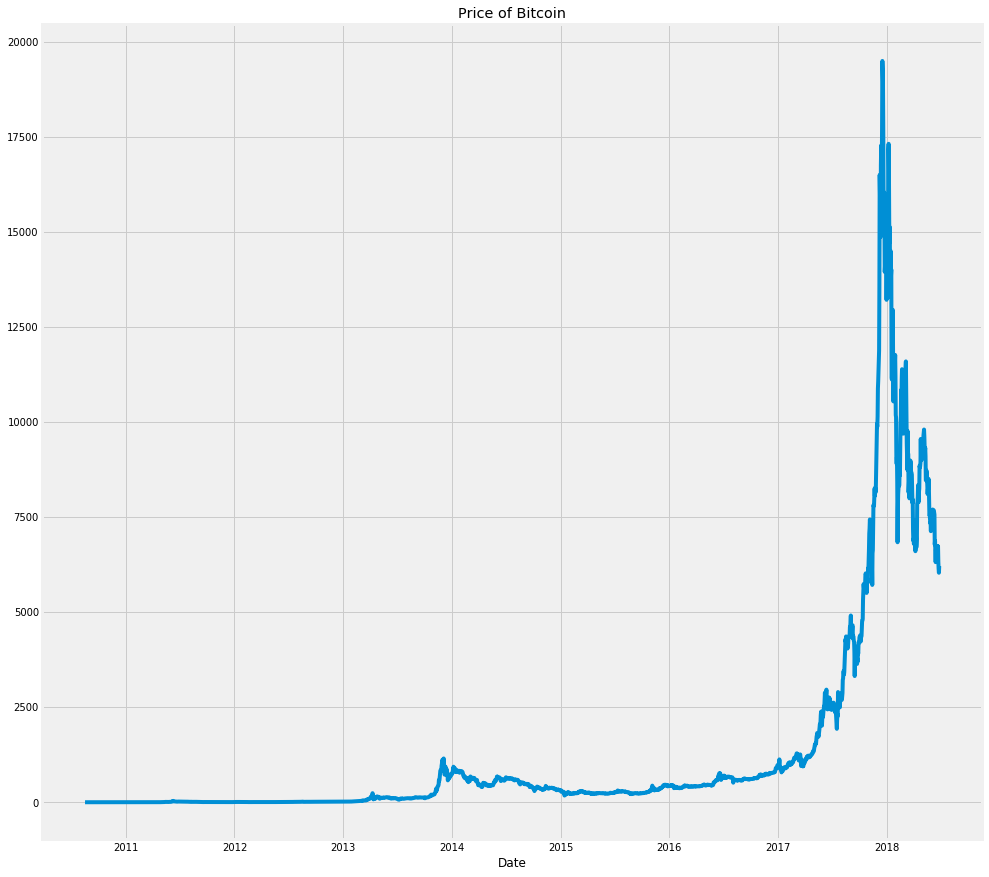

In [87]:
fig, ax=plt.subplots(figsize=(15,15))
btc_nonzero.plot(title='Price of Bitcoin')

In [88]:
#We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 100 units of energy production). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

#Based off the previous chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a bit hard to tell from this one plot, we can always experiment with additive versus multiplicative methods.).

In [89]:
btc_nonzero.describe()

count     2871.000000
mean      1273.781044
std       2849.347949
min          0.060900
25%         11.836000
50%        277.430000
75%        659.775000
max      19498.683333
Name: BCHAIN/MKPRU, dtype: float64

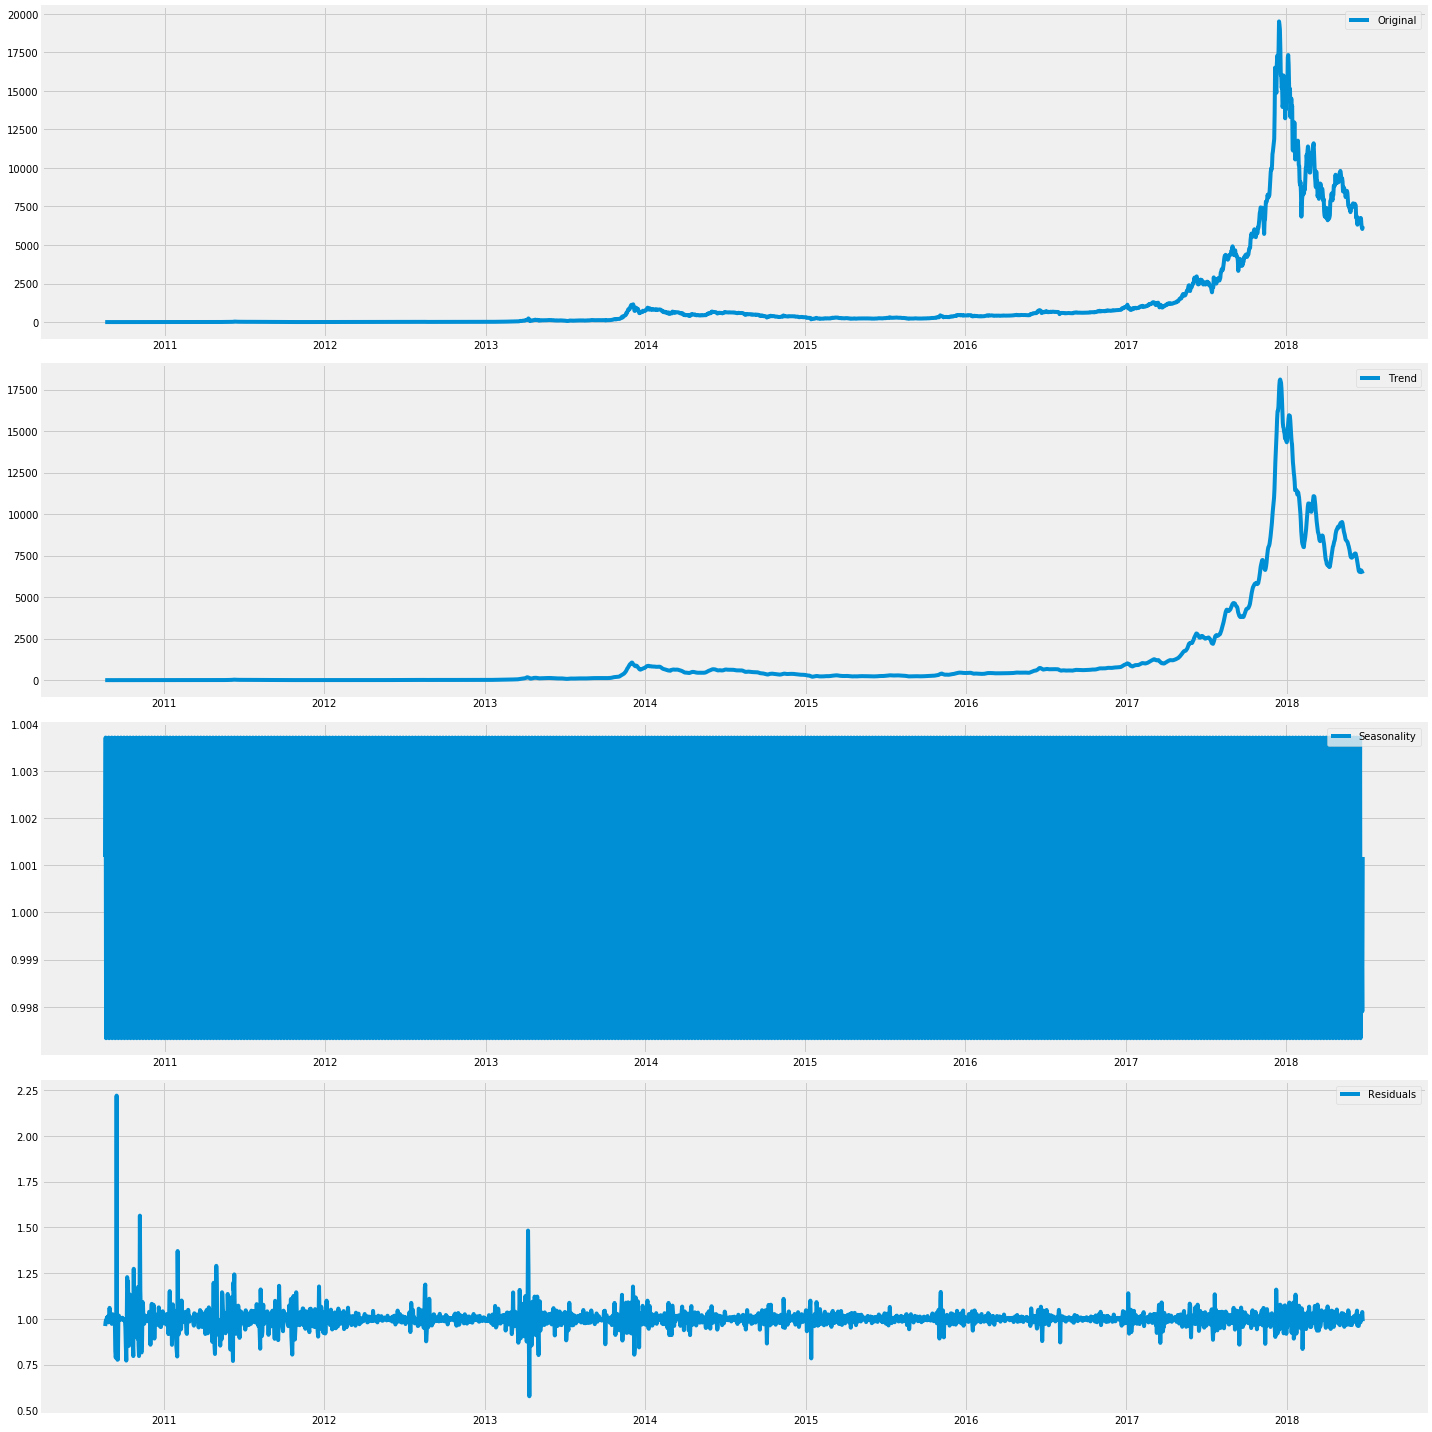

In [90]:

decomposition = seasonal_decompose(btc_nonzero, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax=plt.subplots(figsize=(20,20))
plt.subplot(411)
plt.plot(btc_nonzero, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



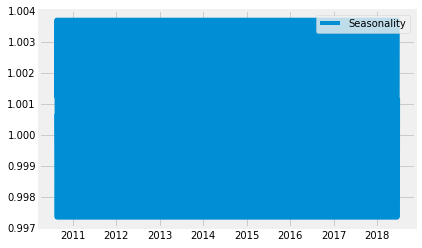

In [91]:
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

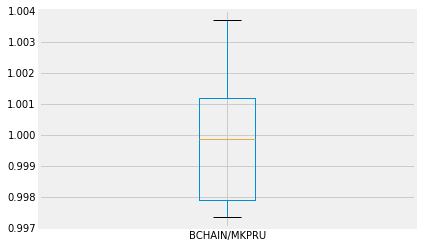

In [92]:
seasonal.plot.box()

In [93]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(btc_nonzero, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=38061.545, BIC=38085.393, Fit time=0.334 seconds
Fit ARIMA: order=(0, 1, 0); AIC=38090.476, BIC=38102.400, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=38081.026, BIC=38098.912, Fit time=0.021 seconds
Fit ARIMA: order=(0, 1, 1); AIC=38079.800, BIC=38097.686, Fit time=0.039 seconds
Fit ARIMA: order=(2, 1, 1); AIC=38077.150, BIC=38106.960, Fit time=0.238 seconds
Fit ARIMA: order=(1, 1, 2); AIC=38062.931, BIC=38092.741, Fit time=0.331 seconds
Fit ARIMA: order=(2, 1, 2); AIC=37946.689, BIC=37982.461, Fit time=0.922 seconds
Fit ARIMA: order=(3, 1, 2); AIC=37983.708, BIC=38025.443, Fit time=1.874 seconds
Fit ARIMA: order=(2, 1, 3); AIC=37982.767, BIC=38024.502, Fit time=1.919 seconds
Fit ARIMA: order=(3, 1, 3); AIC=37938.555, BIC=37986.252, Fit time=1.751 seconds
Total fit time: 7.433 seconds
37938.55547103075


In [94]:
stepwise_model = auto_arima(btc_nonzero, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=38061.545, BIC=38085.393, Fit time=0.377 seconds
Fit ARIMA: order=(0, 1, 0); AIC=38090.476, BIC=38102.400, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=38081.026, BIC=38098.912, Fit time=0.024 seconds
Fit ARIMA: order=(0, 1, 1); AIC=38079.800, BIC=38097.686, Fit time=0.046 seconds
Fit ARIMA: order=(2, 1, 1); AIC=38077.150, BIC=38106.960, Fit time=0.253 seconds
Fit ARIMA: order=(1, 1, 2); AIC=38062.931, BIC=38092.741, Fit time=0.353 seconds
Fit ARIMA: order=(2, 1, 2); AIC=37946.689, BIC=37982.461, Fit time=0.863 seconds
Fit ARIMA: order=(3, 1, 2); AIC=37983.708, BIC=38025.443, Fit time=1.849 seconds
Fit ARIMA: order=(2, 1, 3); AIC=37982.767, BIC=38024.502, Fit time=1.823 seconds
Fit ARIMA: order=(3, 1, 3); AIC=37938.555, BIC=37986.252, Fit time=1.641 seconds
Total fit time: 7.237 seconds
37938.55547103075


In [95]:
btc_nonzero.tail()

Date
2018-06-22    6733.901667
2018-06-23    6332.573333
2018-06-24    6141.605833
2018-06-25    6037.008333
2018-06-26    6211.447500
Freq: D, Name: BCHAIN/MKPRU, dtype: float64

In [96]:
train =btc_nonzero.loc['2010-08-17':'2016-12-31']
test = btc_nonzero.loc['2017-01-01':]

In [97]:
# Train the Model
# We can then train the model by simply calling .fit on the stepwise model and passing in the training data:

stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [98]:
from datetime import date

d0 = date(2016, 12, 31)
d1 = date(2018, 6, 26)
delta = d1 - d0
print (delta.days)

542


In [99]:
future_forecast = stepwise_model.predict(n_periods=542)

In [100]:
print(future_forecast)

[ 949.91898846  959.88910055  972.91889632  976.57272379  970.12773088
  964.52828499  968.56139989  978.69301422  984.27027725  980.70381287
  974.41952206  974.39998606  981.38914785  987.69638076  986.97342867
  981.612948    979.22565818  983.24016192  989.20071185  990.67314357
  987.00776814  983.64298115  985.19515037  990.07802706  992.8810316
  991.07012384  987.74930295  987.54110737  991.00736882  994.31612374
  994.12324878  991.48265898  990.24679116  992.29211506  995.46421641
  996.44861224  994.77879057  993.15692985  994.00716568  996.63616737
  998.30450068  997.62713595  996.09938704  996.09831413  998.00479815
  999.91558745 1000.07562101  998.93842419  998.45188667  999.63738894
 1001.4588979  1002.21290174 1001.59392285 1000.94206343 1001.5274889
 1003.05638143 1004.14452344 1004.04001914 1003.45991937 1003.62465135
 1004.77626381 1005.97185832 1006.29286627 1005.92768692 1005.85961865
 1006.64148115 1007.77773636 1008.39448055 1008.30194327 1008.16317154
 1008.64

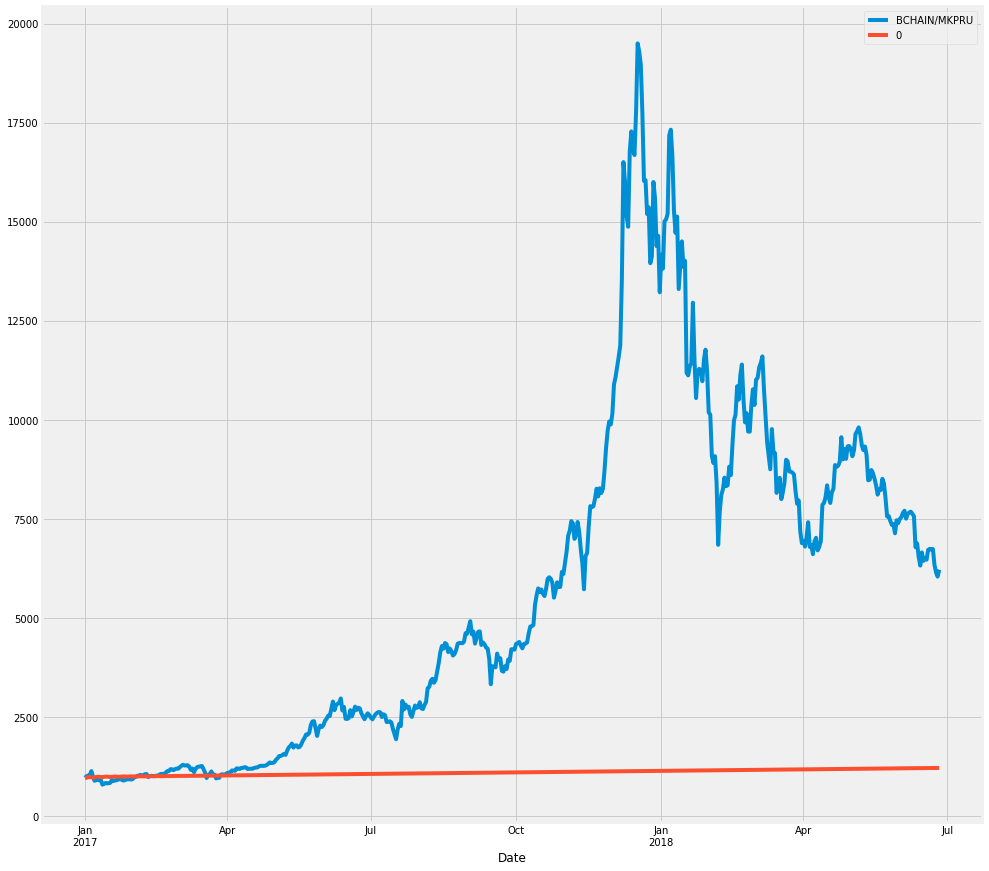

In [101]:
fig, ax=plt.subplots(figsize=(15,15))
future_forecast = pd.DataFrame(future_forecast,index = test.index)
pd.concat([test,future_forecast],axis=1).plot(ax=ax)


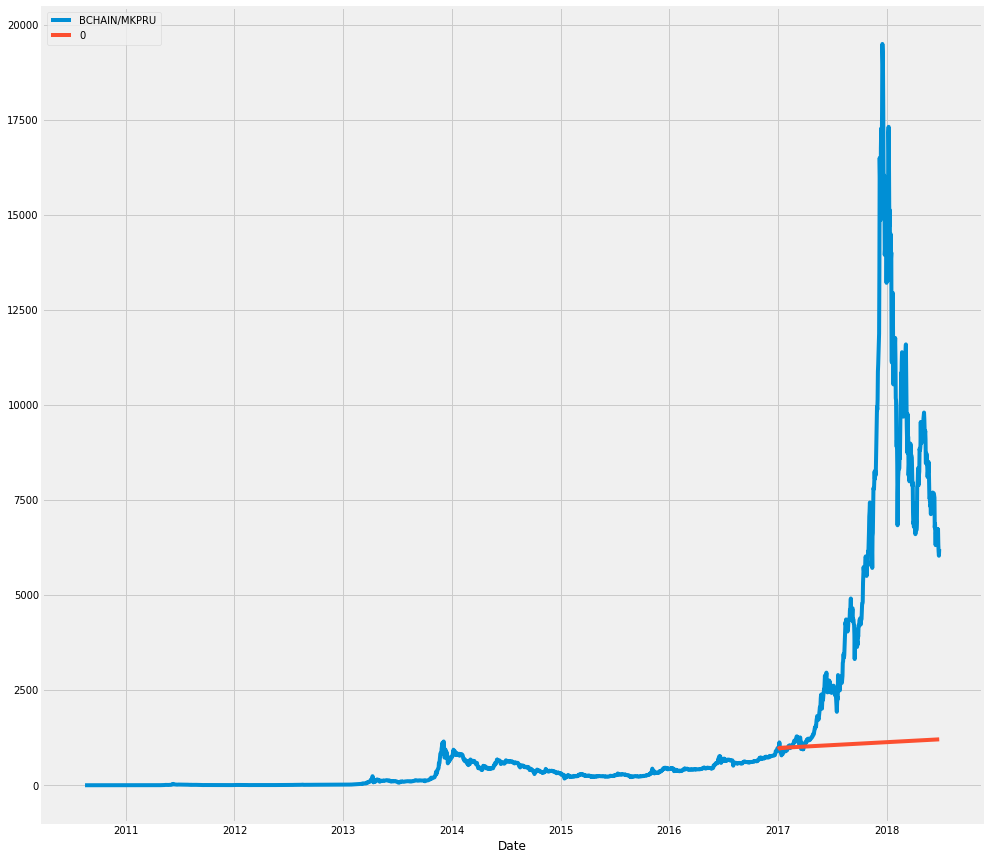

In [102]:
fig, ax=plt.subplots(figsize=(15,15))

pd.concat([btc_nonzero,future_forecast],axis=1).plot(ax=ax)

In [103]:
# if you are satisfied with the model you can now fit to the whole data and fit to the future

# Univariate III

In [104]:
from fbprophet import Prophet

In [105]:
btc_nonzero_df=pd.DataFrame(btc_nonzero)
#btc_nonzero_df.info()
# df = df.rename(columns={'Day': 'ds',
#                         'BCHAIN/MKPRU': 'y'})
btc_nonzero_df.reset_index(inplace=True)


In [106]:
btc_nonzero_df.columns

Index(['Date', 'BCHAIN/MKPRU'], dtype='object')

In [107]:
btc_nonzero_df['Date']=pd.DatetimeIndex(btc_nonzero_df['Date'])

In [108]:
btc_nonzero_df.rename(columns={'Date': 'ds',
                        'BCHAIN/MKPRU': 'y'}, inplace=True)

In [109]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [110]:
my_model.fit(btc_nonzero_df)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [111]:
future_dates = my_model.make_future_dataframe(periods=30, freq='D')
future_dates.tail()

,ds
2896,2018-07-22
2897,2018-07-23
2898,2018-07-24
2899,2018-07-25
2900,2018-07-26


In [112]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2896,2018-07-22,11335.864263,9049.578508,13605.765151
2897,2018-07-23,11336.179677,9028.166539,13613.561457
2898,2018-07-24,11343.053459,8903.155011,13502.606083
2899,2018-07-25,11361.245010,9319.556645,13600.258587
2900,2018-07-26,11361.066925,9025.464081,13512.942166


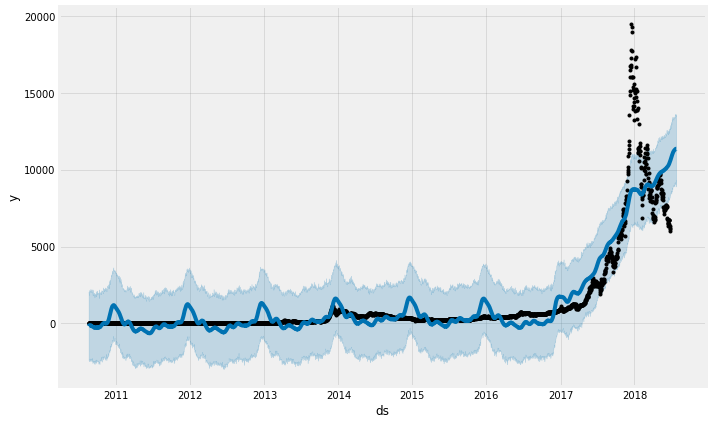

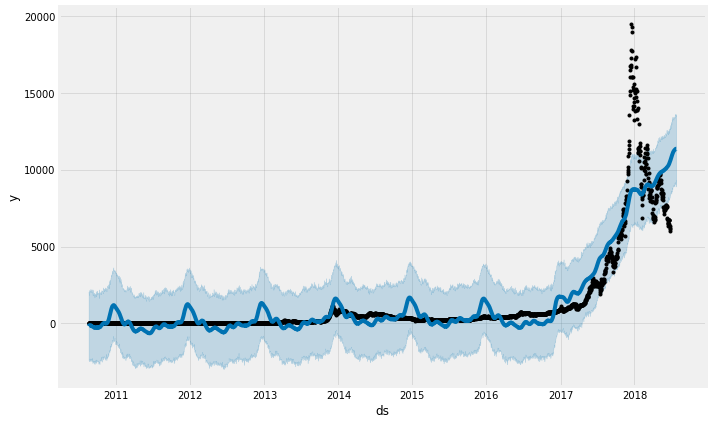

In [113]:
my_model.plot(forecast,
              uncertainty=True)

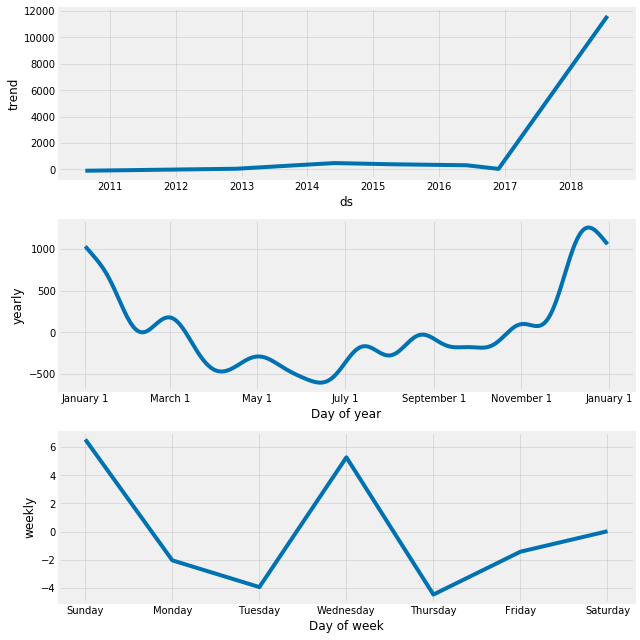

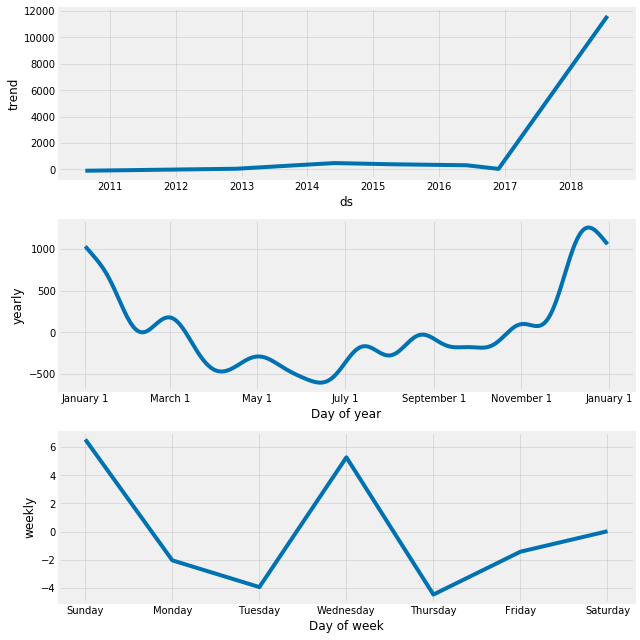

In [114]:
my_model.plot_components(forecast)

# Future Selection 

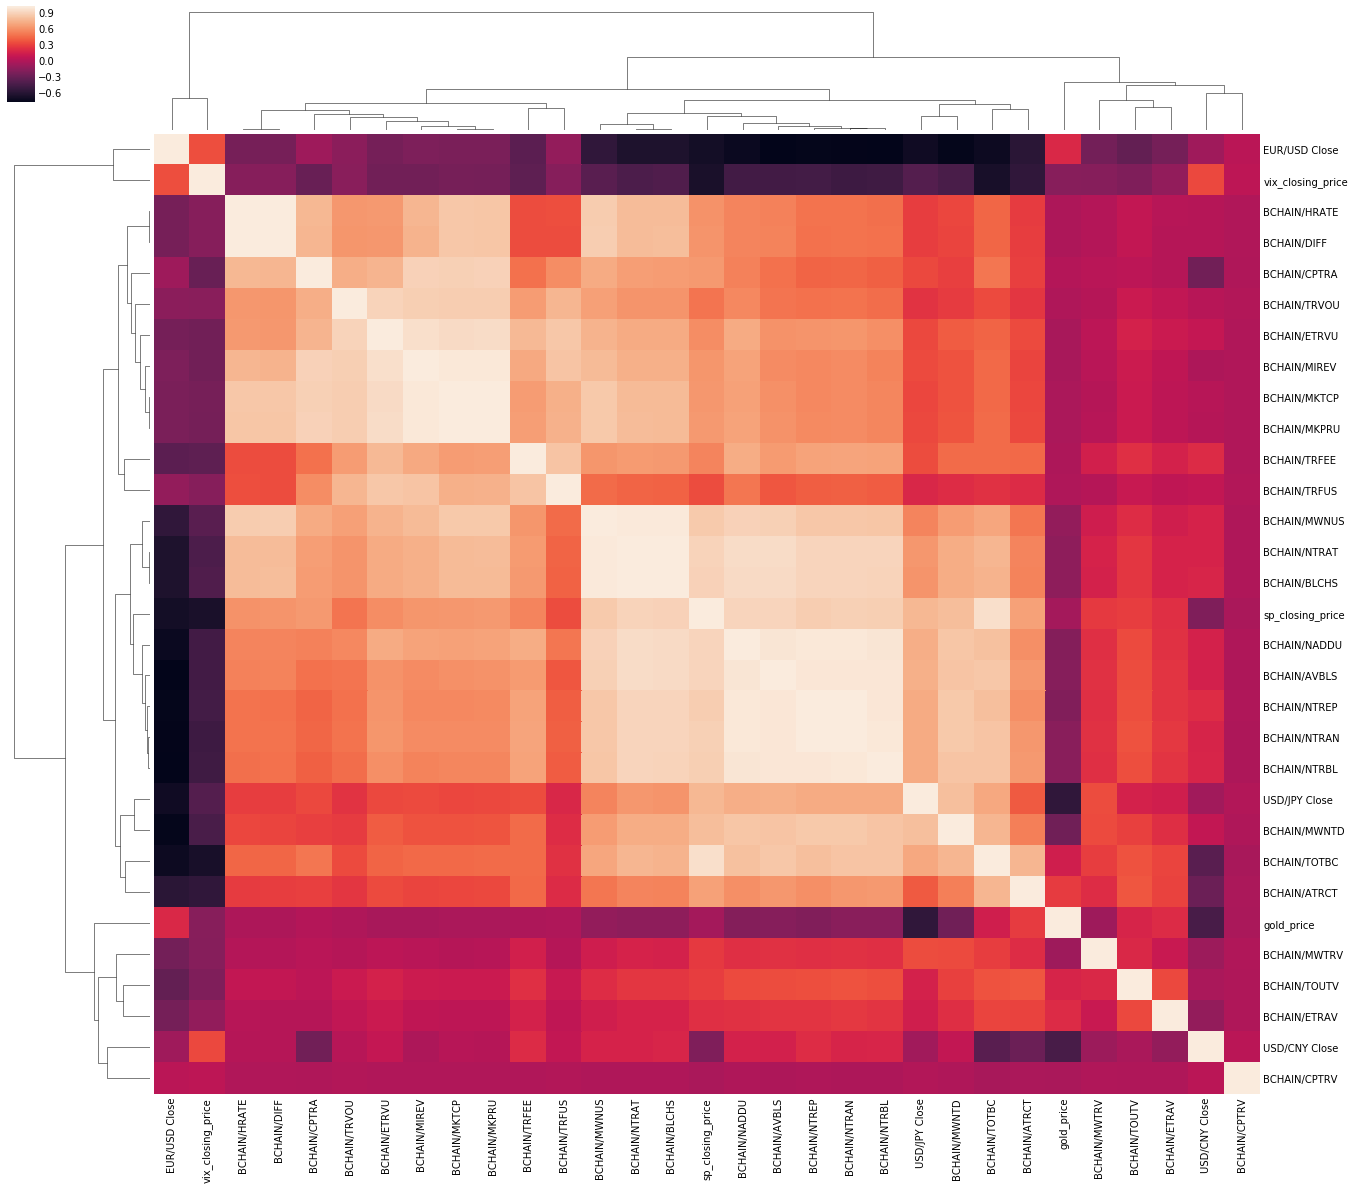

In [115]:
# #Get correlation matrix of the meat DataFrame
final_df_corr = final_df.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels


fig = sns.clustermap(final_df_corr,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(20,20))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show() 

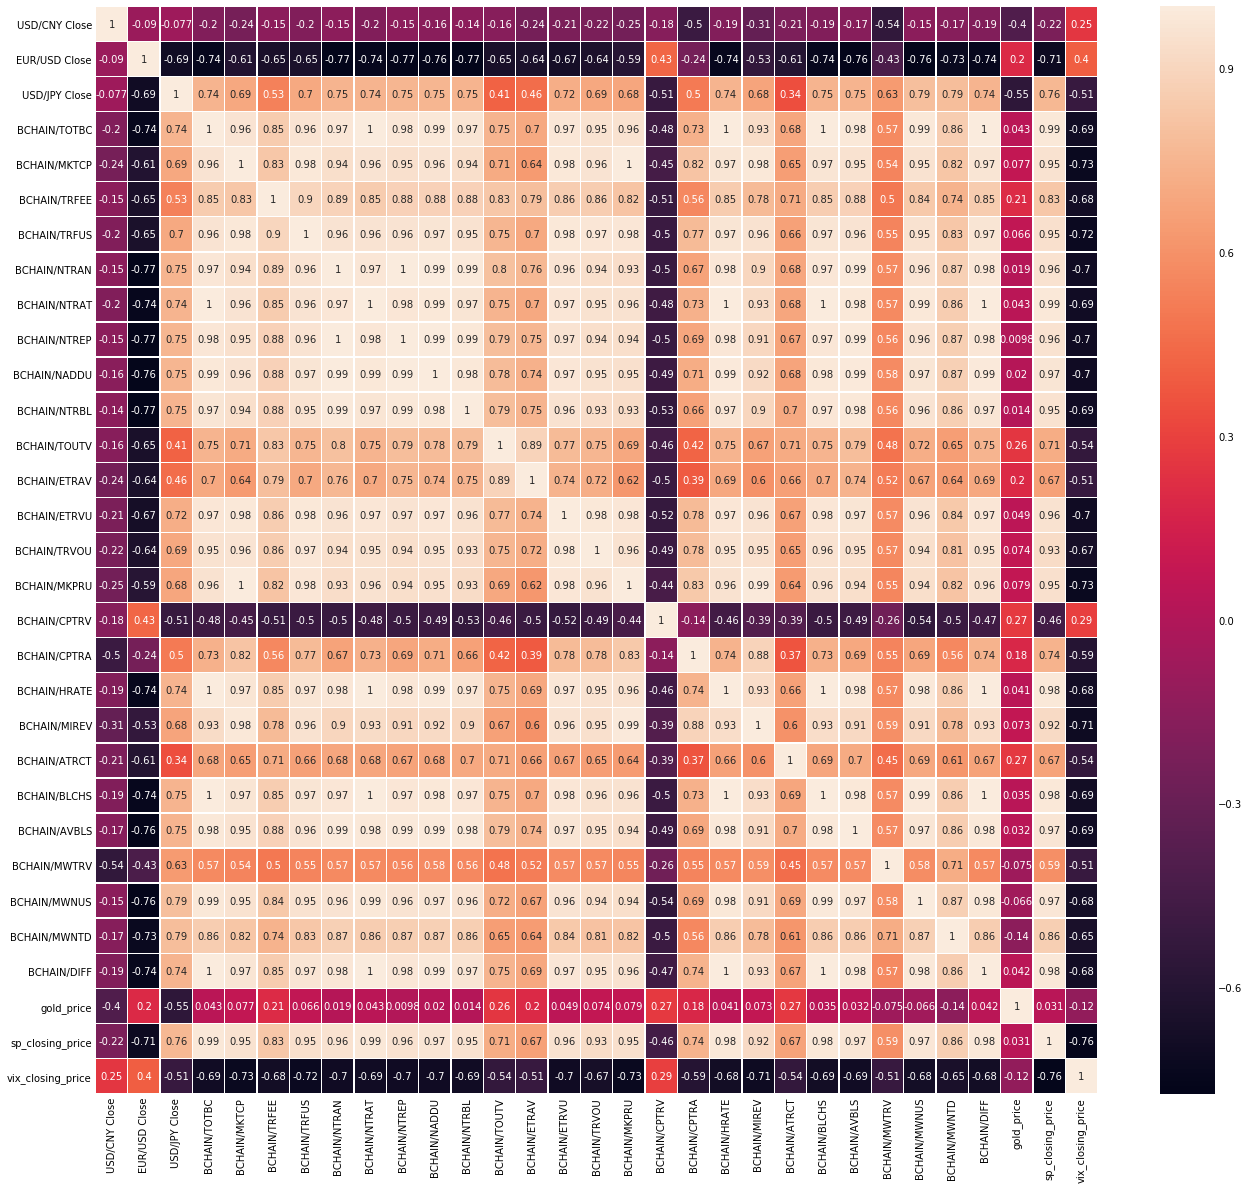

In [116]:
# Get correlation matrix of the meat DataFrame
final_df_corr = final_df.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(final_df_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()


In [117]:
final_df_corr

,USD/CNY Close,EUR/USD Close,USD/JPY Close,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,...,BCHAIN/ATRCT,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/DIFF,gold_price,sp_closing_price,vix_closing_price
USD/CNY Close,1.000000,-0.089553,-0.076507,-0.195148,-0.235093,-0.147664,-0.195937,-0.147694,-0.195148,-0.146213,...,-0.209978,-0.193468,-0.165259,-0.541964,-0.150379,-0.171547,-0.191242,-0.404067,-0.215648,0.253375
EUR/USD Close,-0.089553,1.000000,-0.693908,-0.741103,-0.611516,-0.652258,-0.646410,-0.772687,-0.741103,-0.765352,...,-0.605351,-0.741798,-0.760636,-0.425105,-0.761634,-0.728974,-0.739646,0.199280,-0.714280,0.401706
USD/JPY Close,-0.076507,-0.693908,1.000000,0.744224,0.689642,0.530663,0.695735,0.750171,0.744224,0.753129,...,0.343295,0.748876,0.746698,0.634260,0.793420,0.789708,0.744037,-0.552840,0.758397,-0.509917
BCHAIN/TOTBC,-0.195148,-0.741103,0.744224,1.000000,0.964961,0.853039,0.964810,0.974994,1.000000,0.975359,...,0.683992,0.997882,0.981996,0.569696,0.985531,0.858877,0.997871,0.043088,0.985273,-0.691081
BCHAIN/MKTCP,-0.235093,-0.611516,0.689642,0.964961,1.000000,0.832381,0.982310,0.944394,0.964961,0.948248,...,0.652620,0.966784,0.952324,0.544739,0.951692,0.822898,0.966410,0.076861,0.954542,-0.726399
BCHAIN/TRFEE,-0.147664,-0.652258,0.530663,0.853039,0.832381,1.000000,0.897516,0.887844,0.853039,0.878386,...,0.708524,0.854788,0.880678,0.495093,0.835802,0.743181,0.852308,0.205265,0.828442,-0.683901
BCHAIN/TRFUS,-0.195937,-0.646410,0.695735,0.964810,0.982310,0.897516,1.000000,0.959902,0.964810,0.960691,...,0.662521,0.966791,0.963096,0.547354,0.953362,0.827108,0.965886,0.066169,0.946502,-0.720716
BCHAIN/NTRAN,-0.147694,-0.772687,0.750171,0.974994,0.944394,0.887844,0.959902,1.000000,0.974994,0.996380,...,0.684438,0.974511,0.988879,0.566351,0.960417,0.868675,0.975620,0.018505,0.957512,-0.700418
BCHAIN/NTRAT,-0.195148,-0.741103,0.744224,1.000000,0.964961,0.853039,0.964810,0.974994,1.000000,0.975359,...,0.683992,0.997882,0.981996,0.569696,0.985531,0.858877,0.997871,0.043088,0.985273,-0.691081
BCHAIN/NTREP,-0.146213,-0.765352,0.753129,0.975359,0.948248,0.878386,0.960691,0.996380,0.975359,1.000000,...,0.669031,0.974881,0.986349,0.559658,0.958784,0.865756,0.977233,0.009759,0.958205,-0.699472


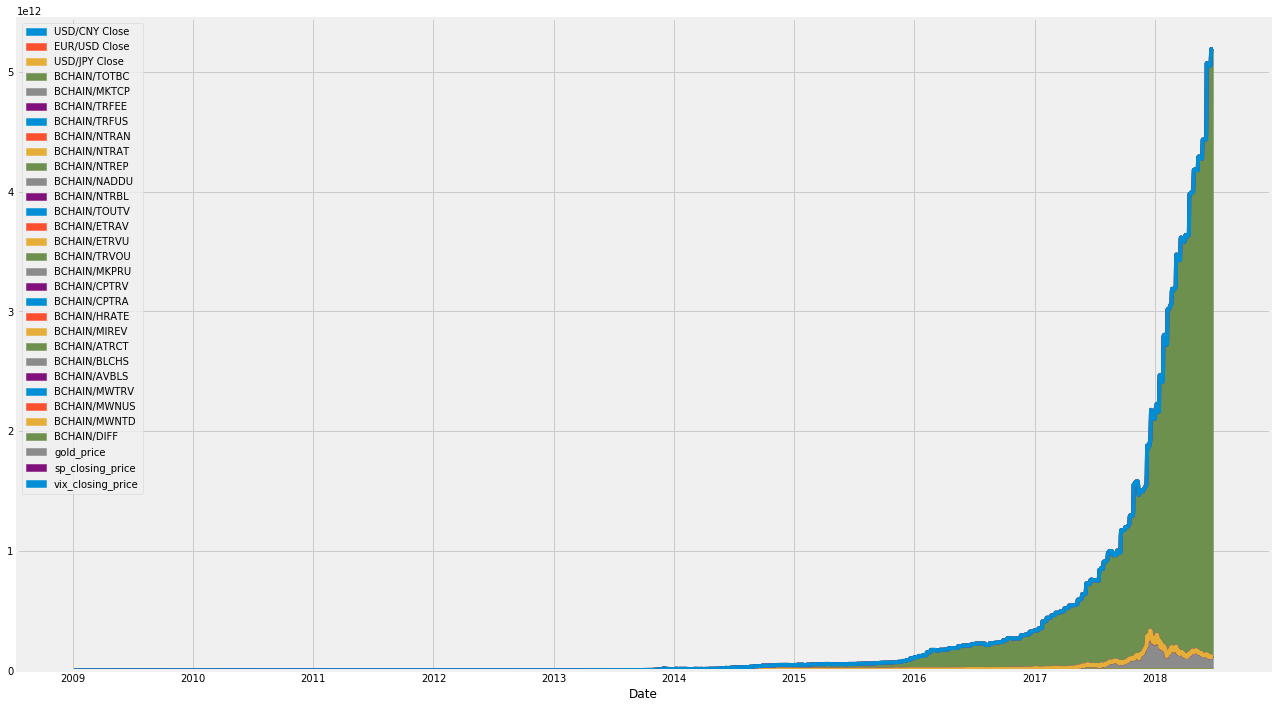

In [118]:
final_df.plot(kind= 'area', figsize =(20,12))

In [119]:
# Rolling window can help us to see either the sort term or the long term trend
#sp500_df.rolling(window=30).agg(['mean', 'std']).plot(subplots=True, figsize=(20,16),sharey=False, layout=(4,4), )

In [121]:
final_df=final_df[final_df['BCHAIN/MKPRU']>0]

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [127]:
# Import necessary modules

X = final_df.drop('BCHAIN/MKPRU', axis=1).values
y = final_df['BCHAIN/MKPRU'].values
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = linear_model.LinearRegression()
# Fit the regressor to the training data
reg_all.fit(X_train, y_train) 

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9998972217908157
Root Mean Squared Error: 27.868749624791782


In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)


[-2.05503477e+04 -1.07133181e+01 -2.37662565e+00 -4.13672829e+00
  3.31090491e-01]


In [146]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.9998797072450979


[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.54323551e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.65259985e-08  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.12546747e-08  0.00000000e+00
 -0.00000000e+00  2.15147292e+00  0.00000000e+00  1.03346586e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.82342615e-02 -0.00000000e+00]


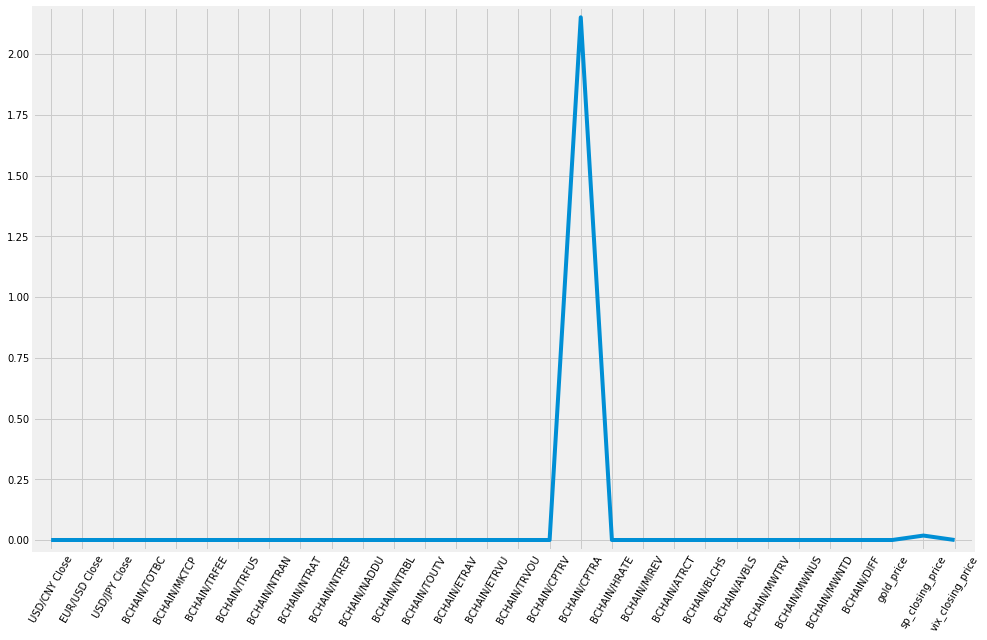

In [137]:
# Import Lasso
from sklearn.linear_model import Lasso
X = final_df.drop('BCHAIN/MKPRU', axis=1).values
y = final_df['BCHAIN/MKPRU'].values
df_columns = final_df.drop('BCHAIN/MKPRU', axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
fig, ax= plt.subplots(figsize=(15,10))
plt.plot(range(len(df_columns)), lasso_coef )
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
while dropped:
    dropped=False
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

print('Remaining variables:')
print(X.columns[variables])
return X[cols[variables]]

Remaining variables:


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [168]:
reg=sm.OLS(X,y)

In [170]:
model=reg.fit()

In [171]:
model.summary()

ValueError: shapes (2871,30) and (2871,30) not aligned: 30 (dim 1) != 2871 (dim 0)

In [147]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [156]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2010-08-17 to 2018-06-26
Freq: D
Data columns (total 31 columns):
USD/CNY Close        2871 non-null float64
EUR/USD Close        2871 non-null float64
USD/JPY Close        2871 non-null float64
BCHAIN/TOTBC         2871 non-null float64
BCHAIN/MKTCP         2871 non-null float64
BCHAIN/TRFEE         2871 non-null float64
BCHAIN/TRFUS         2871 non-null float64
BCHAIN/NTRAN         2871 non-null float64
BCHAIN/NTRAT         2871 non-null float64
BCHAIN/NTREP         2871 non-null float64
BCHAIN/NADDU         2871 non-null float64
BCHAIN/NTRBL         2871 non-null float64
BCHAIN/TOUTV         2871 non-null float64
BCHAIN/ETRAV         2871 non-null float64
BCHAIN/ETRVU         2871 non-null float64
BCHAIN/TRVOU         2871 non-null float64
BCHAIN/MKPRU         2871 non-null float64
BCHAIN/CPTRV         2871 non-null float64
BCHAIN/CPTRA         2871 non-null float64
BCHAIN/HRATE         2871 non-null float64
BCHAIN/

In [ ]:
y = df_final[['BCHAIN/MKPRU']]

In [163]:
reg = ols(BCHAIN/MKPRU ~ gold_price, data=final_df).fit() 

SyntaxError: invalid syntax (<ipython-input-163-028525ae96ae>, line 1)

In [ ]:
index_week= final_df.index.month
final_df.groupby(index_week).mean().plot(kind='area', figsize =(20,12))
plt.show()

In [ ]:
pwd

In [ ]:
final_df.to_csv('C:\\Users\\getud\\Dropbox\\Dereje Personal\\NSS DS\\Predicting-Bitcoin-Prices\\Data\\final_btc.csv')

# Compare the performance of several asset classes

# Clean your time series data

In [ ]:
Summarising and Aggregating 

index_week= df.index.week
df.groupby(index_week).mean().plot()

Summarizing
- df.describe()
- df.boxplot()
- df.plot(kind =hist, bins=n)
- df.plot(kind=density, linewidth=n)

In [ ]:
Visualize correlation matrices
The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 


# Import seaborn library
import seaborn  as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

 ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')# can help to define the locatio of the legend 

In [ ]:
Clustered heatmaps
Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels()
         
 # Import seaborn library
import seabon as sn

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clusermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()    

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()